# Chapter 6 — Linear Model Selection and Regularization

## Lab 1: Subset Selection Methods

In [1]:
library("ggfortify")
library("ggplot2")
library("glmnet")
library("ISLR")
library("leaps")
library("MASS")
library("pls")
library("reshape2")

Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



### Best Subset Selection

In [2]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Major League Baseball Data from the 1986 and 1987 seasons.

A data frame with 322 observations of major league players on the following 20 variables.

Variable | Description
:--- | :---
AtBat | Number of times at bat in 1986
Hits | Number of hits in 1986
HmRun | Number of home runs in 1986
Runs | Number of runs in 1986
RBI | Number of runs batted in in 1986
Walks | Number of walks in 1986
Years | Number of years in the major leagues
CAtBat | Number of times at bat during his career
CHits | Number of hits during his career
CHmRun | Number of home runs during his career
CRuns | Number of runs during his career
CRBI | Number of runs batted in during his career
CWalks | Number of walks during his career
League | A factor with levels A and N indicating player's league at the end of 1986
Division | A factor with levels E and W indicating player's division at the end of 1986
PutOuts | Number of put outs in 1986
Assists | Number of assists in 1986
Errors | Number of errors in 1986
Salary | 1987 annual salary on opening day in thousands of dollars
NewLeague | A factor with levels A and N indicating player's league at the beginning of 1987


We wish to predict a baseball player’s **Salary** on the basis of various statistics associated with performance in the previous year.

In [3]:
dim(Hitters)

[1] 322  20

In [4]:
colSums(is.na(Hitters))

AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
        0         0         0         0         0         0         0         0 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
        0         0         0         0         0         0         0         0 
  Assists    Errors    Salary NewLeague 
        0         0        59         0

**Salary** is missing for 59 players.

In [5]:
Hitters <- na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [6]:
sum(is.na(Hitters))

[1] 0

The `regsubsets()` function performs the best subset selection.

In [7]:
library("leaps")

In [8]:
regfit.full <- regsubsets(Salary ~ ., Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

An asterisk indicates that a given variable is included in the corresponding model. For instance, this output indicates that the best two-variable model contains only **Hits** and **CRBI**.

In [9]:
regfit.full <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
reg.summary <- summary(regfit.full)

In [10]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [11]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

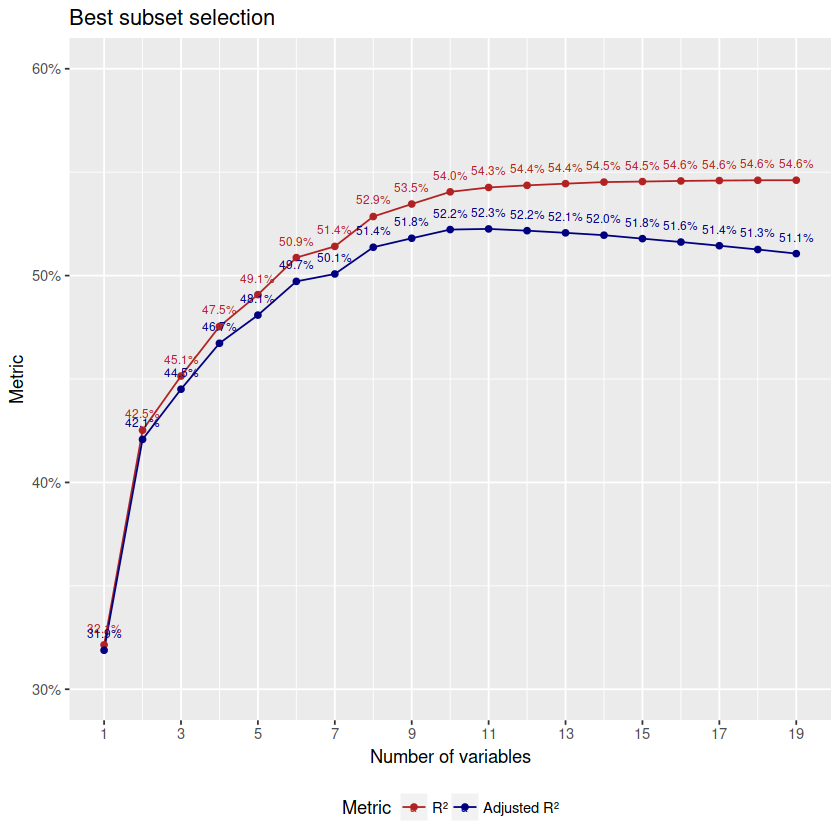

In [12]:
rsq <- data.frame(
    n = 1:19, 
    rsq = reg.summary$rsq,
    adjrsq = reg.summary$adjr2
)
rsq <- melt(rsq, id.vars = "n", variable.name = "metric")

ggplot(rsq, aes(n, value, colour = metric)) + 
    geom_line() +
    geom_point() +
    geom_text(aes(label = scales::percent(value)), 
              size = 2.5, nudge_y = 0.008) +
    scale_y_continuous(limit = c(0.3, 0.6),
                       label = scales::percent) +
    scale_x_continuous(breaks = seq(1, 19, 2)) +
    scale_colour_manual("Metric", 
                        values = c("firebrick", "navyblue"),
                        labels = c("R²", "Adjusted R²")) +
    xlab("Number of variables") +
    ylab("Metric") +
    ggtitle("Best subset selection") +
    theme(legend.position = "bottom")

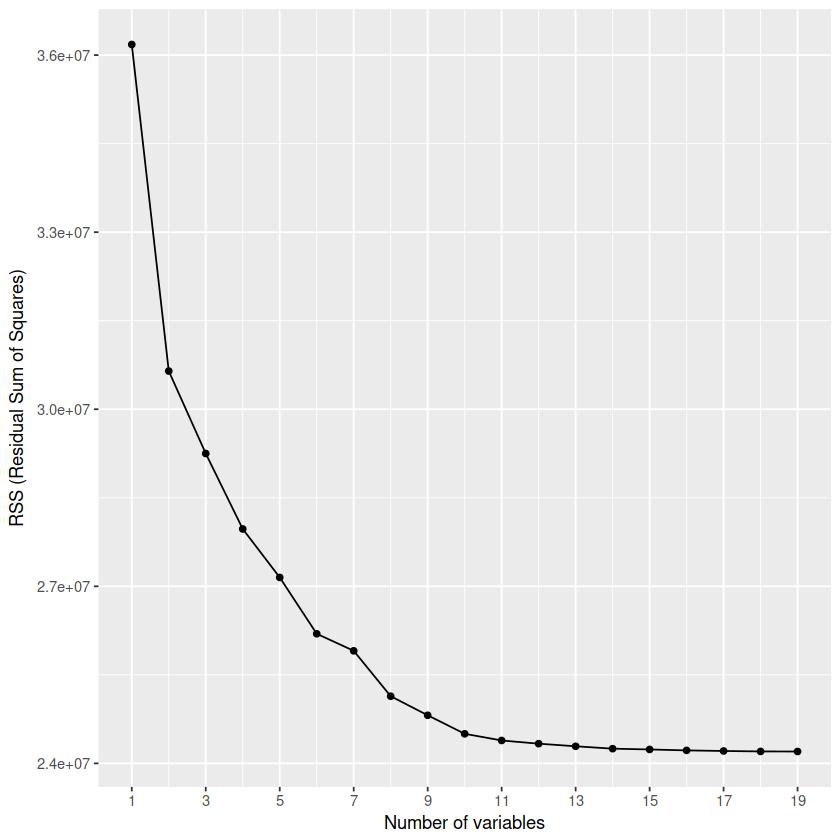

In [13]:
rss <- data.frame(
    n = 1:19, 
    rss = reg.summary$rss
)

ggplot(rss, aes(n, rss)) +
    geom_line() +
    geom_point() +
    scale_x_continuous(breaks = seq(1, 19, 2)) +
    xlab("Number of variables") +
    ylab("RSS (Residual Sum of Squares)")

In [14]:
which.max(reg.summary$adjr2)

[1] 11

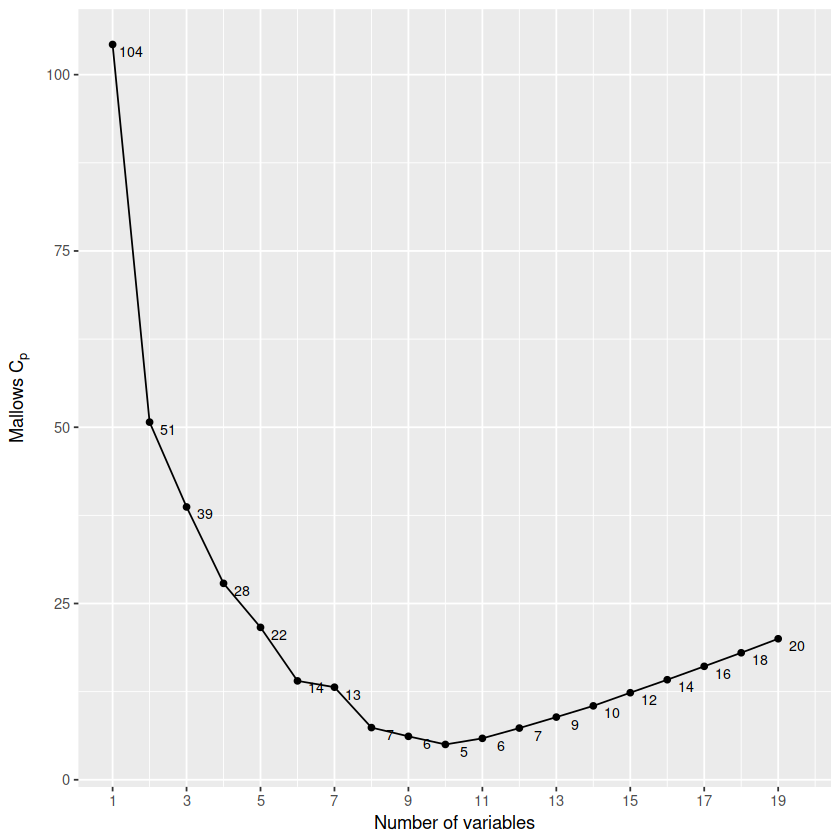

In [15]:
cp <- data.frame(
    n = 1:19, 
    cp = reg.summary$cp,
    bic = reg.summary$bic
)

ggplot(cp, aes(n, cp)) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = round(cp)), 
              size = 3, nudge_x = 0.5, nudge_y = -1) +
    scale_x_continuous(breaks = seq(1, 19, 2)) +
    xlab("Number of variables") +
    ylab(expression(Mallows~C[p]))

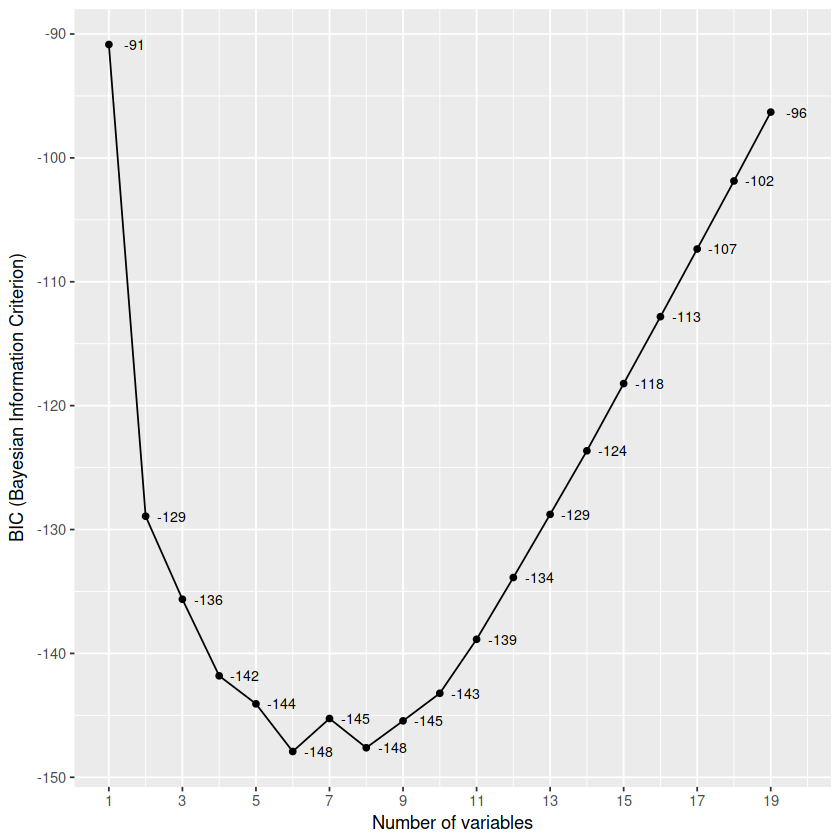

In [16]:
cp <- data.frame(
    n = 1:19, 
    cp = reg.summary$cp,
    bic = reg.summary$bic
)

ggplot(cp, aes(n, bic)) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = round(bic)), 
              size = 3, nudge_x = 0.7) +
    scale_x_continuous(breaks = seq(1, 19, 2)) +
    xlab("Number of variables") +
    ylab("BIC (Bayesian Information Criterion)")

In [17]:
data.frame(
    "Adj R^2" = which.max(reg.summary$adjr2),
    `Cp` = which.min(reg.summary$cp),
    `BIC` = which.min(reg.summary$bic)
)

Adj.R.2,Cp,BIC
11,10,6


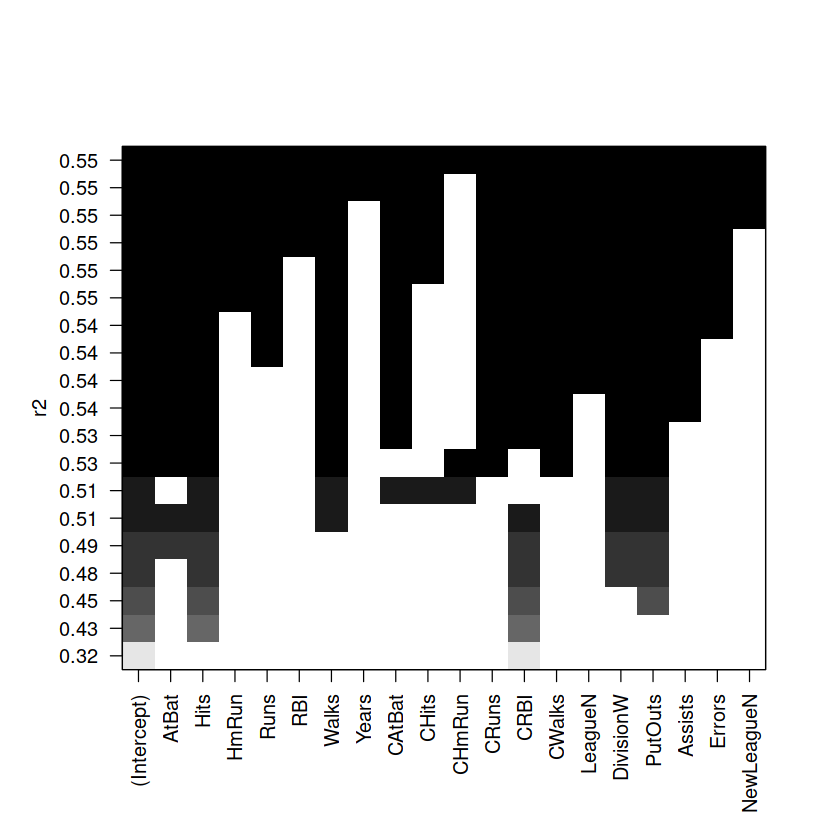

In [18]:
plot(regfit.full, scale = "r2")

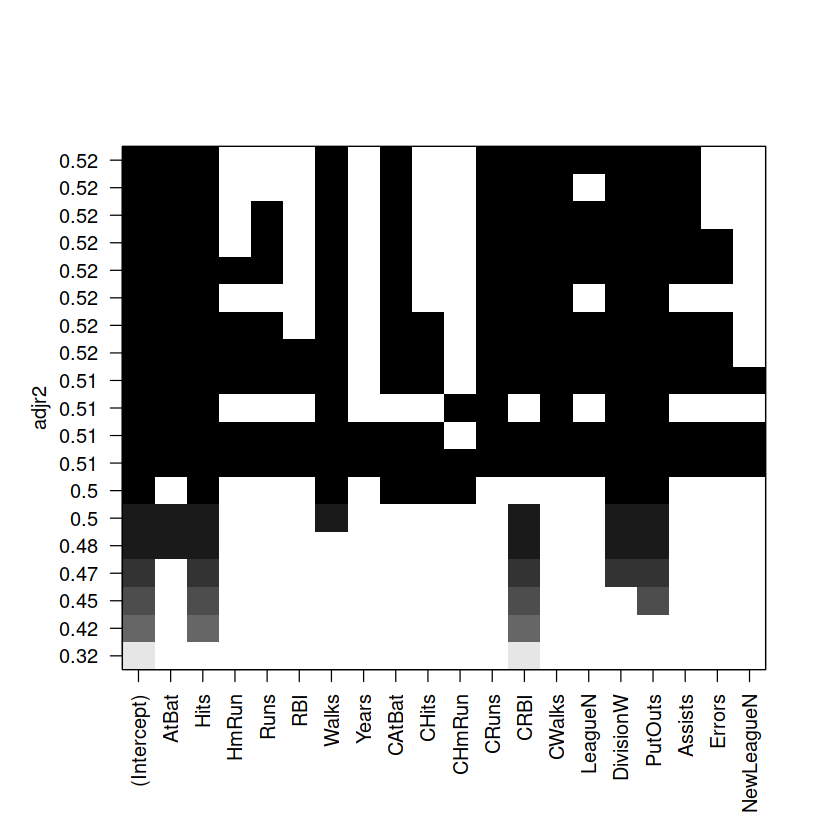

In [19]:
plot(regfit.full, scale = "adjr2")

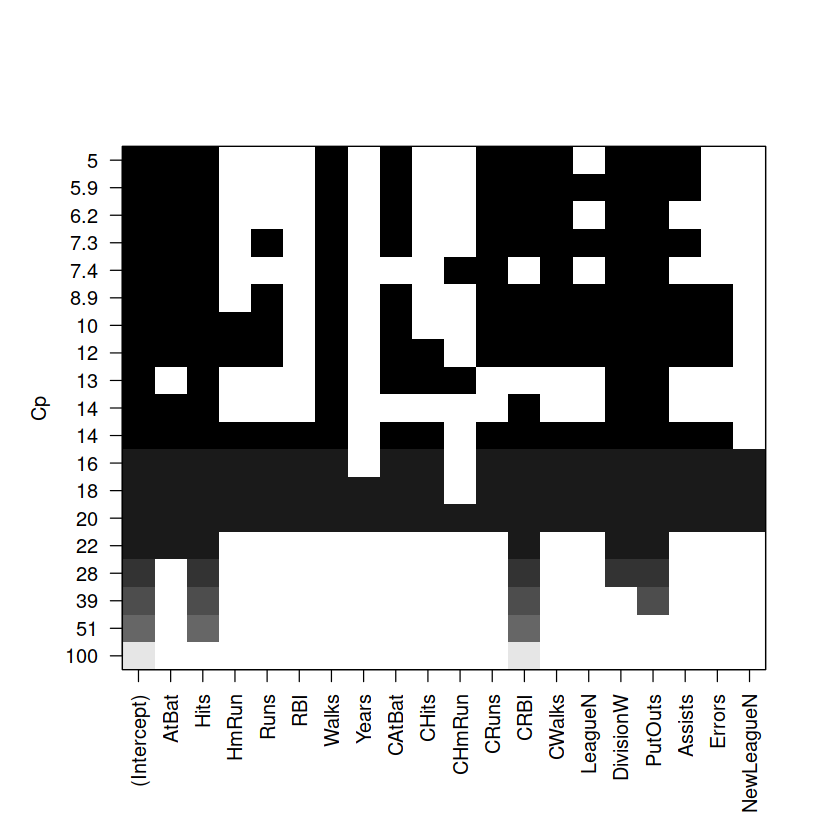

In [20]:
plot(regfit.full, scale = "Cp")

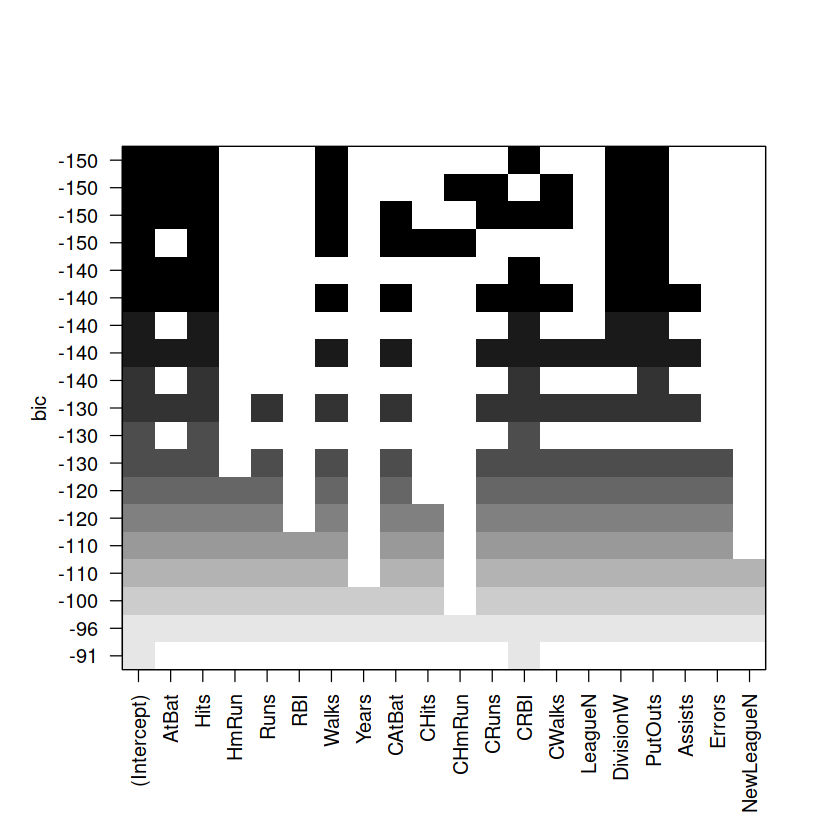

In [21]:
plot(regfit.full, scale = "bic")

In [22]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

### Forward and Backward Stepwise Selection

In [23]:
regfit.fwd <- regsubsets(Salary ~ ., data = Hitters,
                         nvmax = 19, method = "forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [24]:
regfit.bwd <- regsubsets(Salary ~ ., data = Hitters,
                         nvmax = 19, method = "backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [25]:
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [26]:
library(tibble)

In [27]:
ss.sel <- rownames_to_column(data.frame(coef(regfit.full, 7)))
fwd.sel <- rownames_to_column(data.frame(coef(regfit.fwd, 7)))
bwd.sel <- rownames_to_column(data.frame(coef(regfit.bwd, 7)))

ss.sel %>% full_join(fwd.sel) %>% full_join(bwd.sel)

Joining, by = "rowname"
Joining, by = "rowname"


rowname,coef.regfit.full..7.,coef.regfit.fwd..7.,coef.regfit.bwd..7.
(Intercept),79.4509472,109.7873062,105.6487488
Hits,1.2833513,7.4498772,6.7574914
Walks,3.2274264,4.9131401,6.0558691
CAtBat,-0.3752350,NA,NA
CHits,1.4957073,NA,NA
CHmRun,1.4420538,NA,NA
DivisionW,-129.9866432,-127.1223928,-116.1692169
PutOuts,0.2366813,0.2533404,0.3028847
AtBat,NA,-1.9588851,-1.9762838
CRBI,NA,0.8537622,NA


### Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [28]:
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
test <- !train

In [29]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters[train, ],
                          nvmax = 19)

In [30]:
test.mat <- model.matrix(Salary ~ ., data = Hitters[test, ])

In [31]:
val.errors <- rep(NA, 19)
for (i in 1:19) {
    coefi <- coef(regfit.best, id = i)
    pred <- test.mat[, names(coefi)] %*% coefi
    val.errors[i] <- mean((Hitters$Salary[test] - pred)^2)
}
val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

In [32]:
which.min(val.errors)

[1] 10

In [33]:
coef(regfit.best, 10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

In [34]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

In [35]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
data.frame(coef(regfit.best, 10))

,coef.regfit.best..10.
(Intercept),162.5354420
AtBat,-2.1686501
Hits,6.9180175
Walks,5.7732246
CAtBat,-0.1300798
CRuns,1.4082490
CRBI,0.7743122
CWalks,-0.8308264
DivisionW,-112.3800575
PutOuts,0.2973726


In [36]:
k <- 10
set.seed(1)
folds <- sample(1:k, nrow(Hitters), replace = TRUE)
cv.errors <- matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))

for (j in 1:k) {
    best.fit <- regsubsets(Salary ~ ., data = Hitters[folds != j, ],
                           nvmax = 19)
    for (i in 1:19) {
        pred <- predict(best.fit, Hitters[folds == j, ], id = i)
        cv.errors[j, i] <- mean((Hitters$Salary[folds == j] - pred)^2)
    }
}

mean.cv.errors <- apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

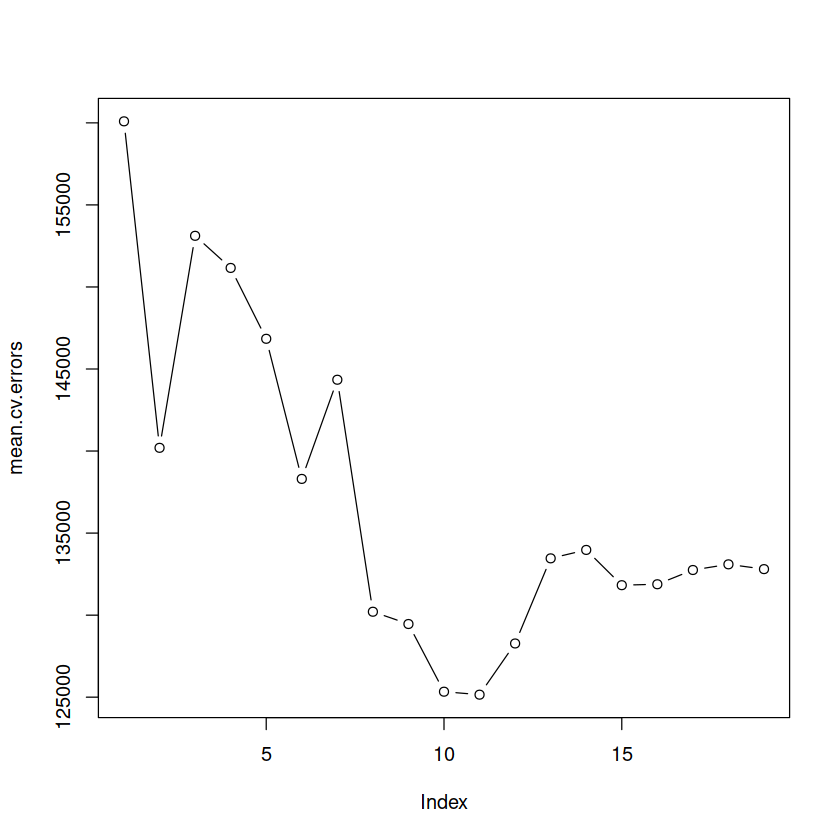

In [37]:
par(mfrow = c(1, 1))
plot(mean.cv.errors, type = "b")

In [38]:
reg.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(reg.best, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

## Lab  2: Ridge Regression and the Lasso

In [39]:
x <- model.matrix(Salary ~ ., Hitters)[, -1]
y <- Hitters$Salary

### Ridge Regression

In [40]:
grid <- 10^seq(10, -2, length = 100)
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

In [41]:
dim(coef(ridge.mod))

[1]  20 100

In [42]:
ridge.mod$lambda[50]

[1] 11497.57

In [43]:
data.frame(coef(ridge.mod)[, 50])

,coef.ridge.mod....50.
(Intercept),407.356050200
AtBat,0.036957182
Hits,0.138180344
HmRun,0.524629976
Runs,0.230701523
RBI,0.239841459
Walks,0.289618741
Years,1.107702929
CAtBat,0.003131815
CHits,0.011653637


In [44]:
sqrt(sum(coef(ridge.mod)[-1, 50]^2))

[1] 6.360612

In [45]:
ridge.mod$lambda[60]

[1] 705.4802

In [46]:
data.frame(coef(ridge.mod)[, 60])

,coef.ridge.mod....60.
(Intercept),54.32519950
AtBat,0.11211115
Hits,0.65622409
HmRun,1.17980910
Runs,0.93769713
RBI,0.84718546
Walks,1.31987948
Years,2.59640425
CAtBat,0.01083413
CHits,0.04674557


In [47]:
coef(ridge.mod)[, c(50, 60)]

20 x 2 sparse Matrix of class "dgCMatrix"
                      s49          s59
(Intercept) 407.356050200  54.32519950
AtBat         0.036957182   0.11211115
Hits          0.138180344   0.65622409
HmRun         0.524629976   1.17980910
Runs          0.230701523   0.93769713
RBI           0.239841459   0.84718546
Walks         0.289618741   1.31987948
Years         1.107702929   2.59640425
CAtBat        0.003131815   0.01083413
CHits         0.011653637   0.04674557
CHmRun        0.087545670   0.33777318
CRuns         0.023379882   0.09355528
CRBI          0.024138320   0.09780402
CWalks        0.025015421   0.07189612
LeagueN       0.085028114  13.68370191
DivisionW    -6.215440973 -54.65877750
PutOuts       0.016482577   0.11852289
Assists       0.002612988   0.01606037
Errors       -0.020502690  -0.70358655
NewLeagueN    0.301433531   8.61181213

In [48]:
data.frame(
    coef = predict(ridge.mod, s = 50, type = "coefficients")[1:20, ]
)

,coef
(Intercept),4.876610e+01
AtBat,-3.580999e-01
Hits,1.969359e+00
HmRun,-1.278248e+00
Runs,1.145892e+00
RBI,8.038292e-01
Walks,2.716186e+00
Years,-6.218319e+00
CAtBat,5.447837e-03
CHits,1.064895e-01


In [49]:
set.seed(1)
train <- sample(1:nrow(x), nrow(x) / 2)
test <- -train
y.test <- y[test]

In [50]:
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0,
                    lambda = grid, thresh = 1e-12)
ridge.pred <- predict(ridge.mod, s = 4, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 101036.8

In [51]:
mean((mean(y[train]) - y.test)^2)

[1] 193253.1

In [52]:
ridge.pred <- predict(ridge.mod, s = 1e10, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 193253.1

In [53]:
ridge.pred <- predict(ridge.mod, x = x[train, ], y = y[train],
                      s = 0, newx = x[test, ], exact = TRUE)
mean((ridge.pred - y.test)^2)

[1] 114783.1

In [54]:
lm(y ~ x, subset = train)


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
  299.42849     -2.54027      8.36682     11.64512     -9.09923      2.44105  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
    9.23440    -22.93673     -0.18154     -0.11598     -1.33888      3.32838  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    0.07536     -1.07841     59.76065    -98.86233      0.34087      0.34165  
    xErrors  xNewLeagueN  
   -0.64207     -0.67442  


In [55]:
predict(ridge.mod, x = x[train, ], y = y[train], s = 0,
        exact = TRUE, type = "coefficient")[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
299.42883596  -2.54014665   8.36611719  11.64400720  -9.09877719   2.44152119 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  9.23403909 -22.93584442  -0.18160843  -0.11561496  -1.33836534   3.32817777 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.07511771  -1.07828647  59.76529059 -98.85996590   0.34086400   0.34165605 
      Errors   NewLeagueN 
 -0.64205839  -0.67606314

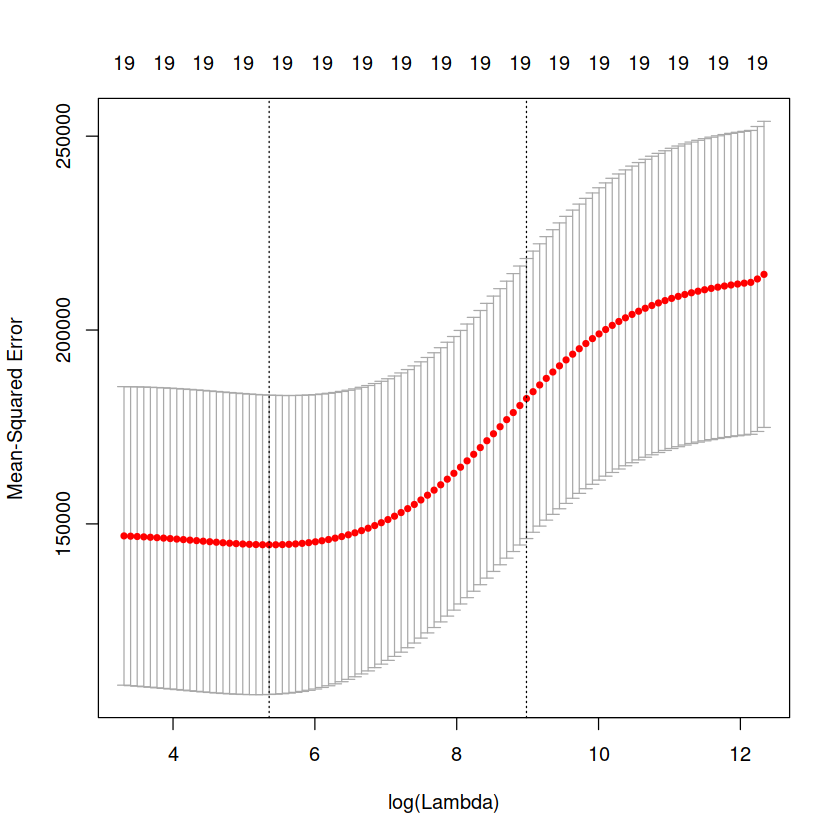

In [56]:
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv.out)

In [57]:
bestlam <- cv.out$lambda.min
bestlam

[1] 211.7416

In [58]:
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 96015.51

In [59]:
out <- glmnet(x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam)[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074383   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227527 -91.63411282   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208394

### The Lasso

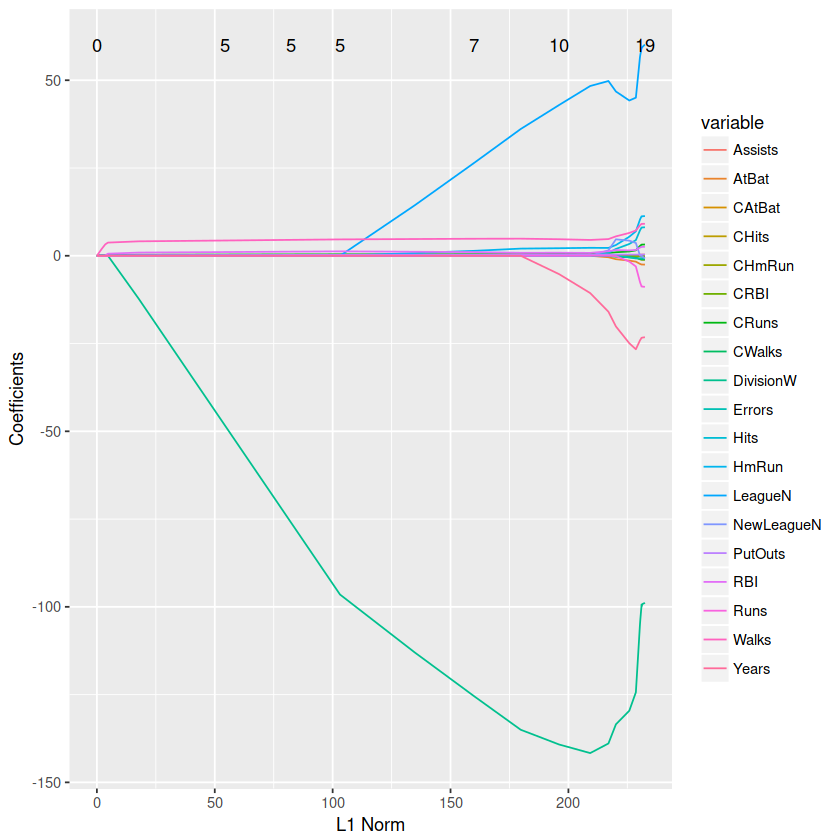

In [60]:
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda = grid)
autoplot(lasso.mod)

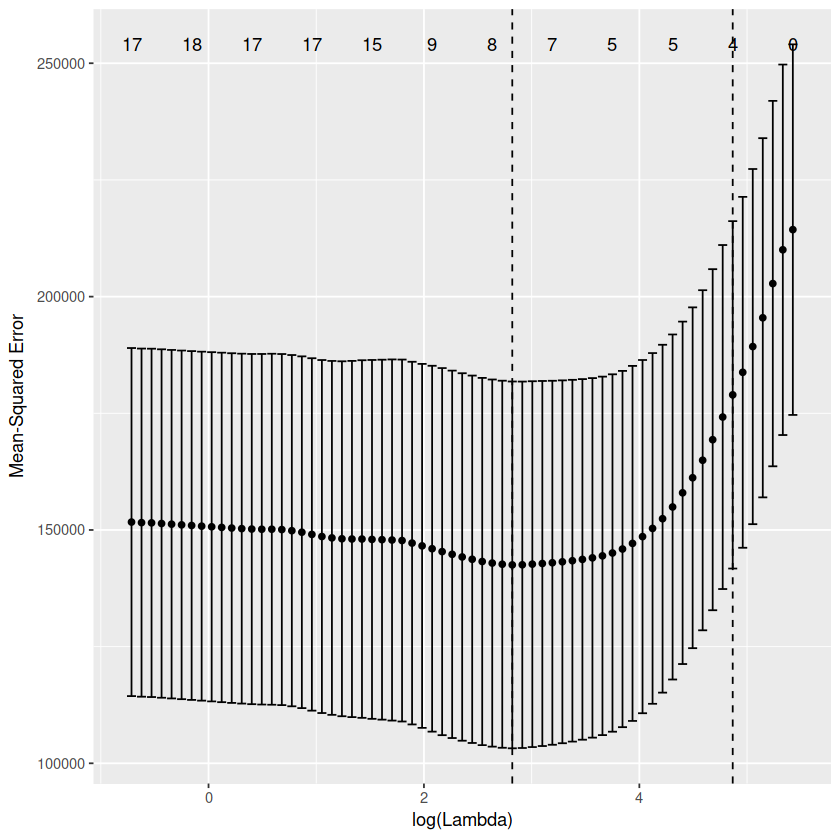

In [61]:
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1)
autoplot(cv.out)

In [62]:
bestlam <- cv.out$lambda.min
lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test, ])
mean((lasso.pred - y.test)^2)

[1] 100743.4

In [63]:
out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso.coef <- predict(out, type = "coefficients", s = bestlam)[1:20, ]
data.frame(lasso.coef)

,lasso.coef
(Intercept),18.5394844
AtBat,0.0000000
Hits,1.8735390
HmRun,0.0000000
Runs,0.0000000
RBI,0.0000000
Walks,2.2178444
Years,0.0000000
CAtBat,0.0000000
CHits,0.0000000


## Lab 3: PCR and PLS Regression

### Principal Components Regression

In [64]:
set.seed(2)
pcr.fit <- pcr(Salary ~ ., data = Hitters, scale = TRUE,
               validation = "CV")
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

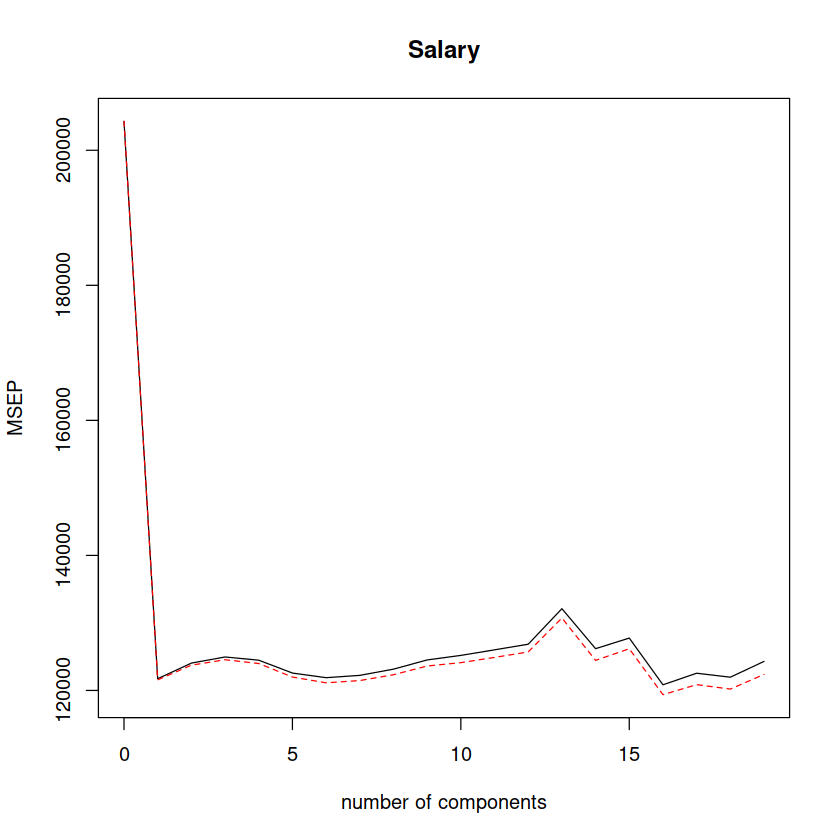

In [65]:
validationplot(pcr.fit, val.type = "MSEP")

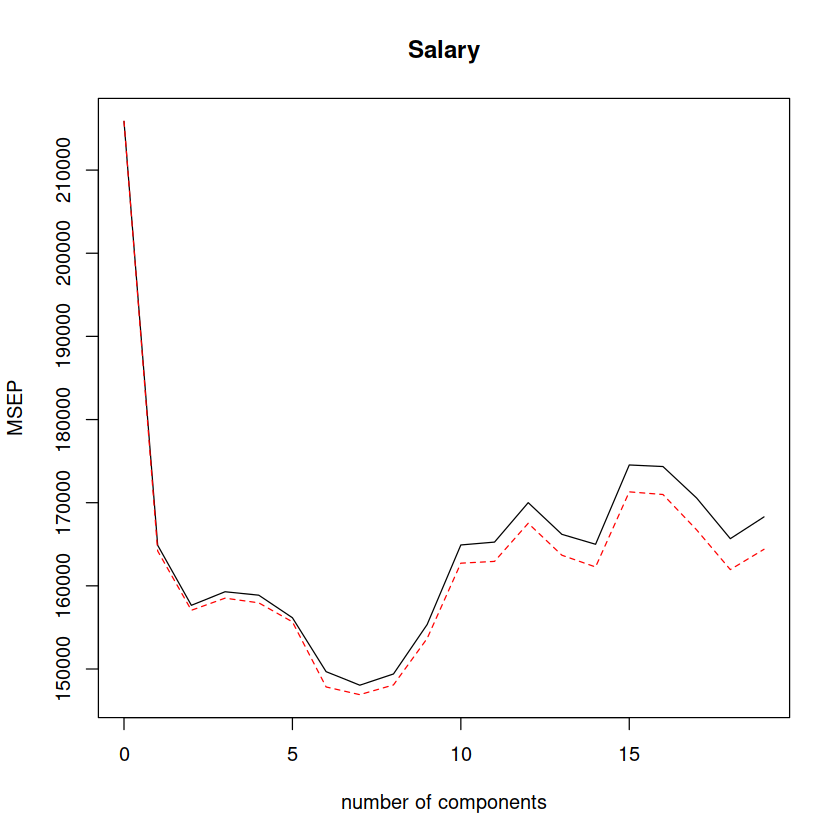

In [66]:
set.seed(1)
pcr.fit <- pcr(Salary ~ ., data = Hitters, subset = train,
               scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type = "MSEP")

In [67]:
pcr.pred <- predict(pcr.fit, x[test, ], ncomp = 7)
mean((pcr.pred - y.test)^2)

[1] 96556.22

In [68]:
pcr.fit <- pcr(y ~ x, scale = TRUE, ncomp = 7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


### Partial Least Squares

In [69]:
set.seed(1)
pls.fit <- plsr(Salary ~ ., data = Hitters, subset = train,
                scale = TRUE, validation = "CV")
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

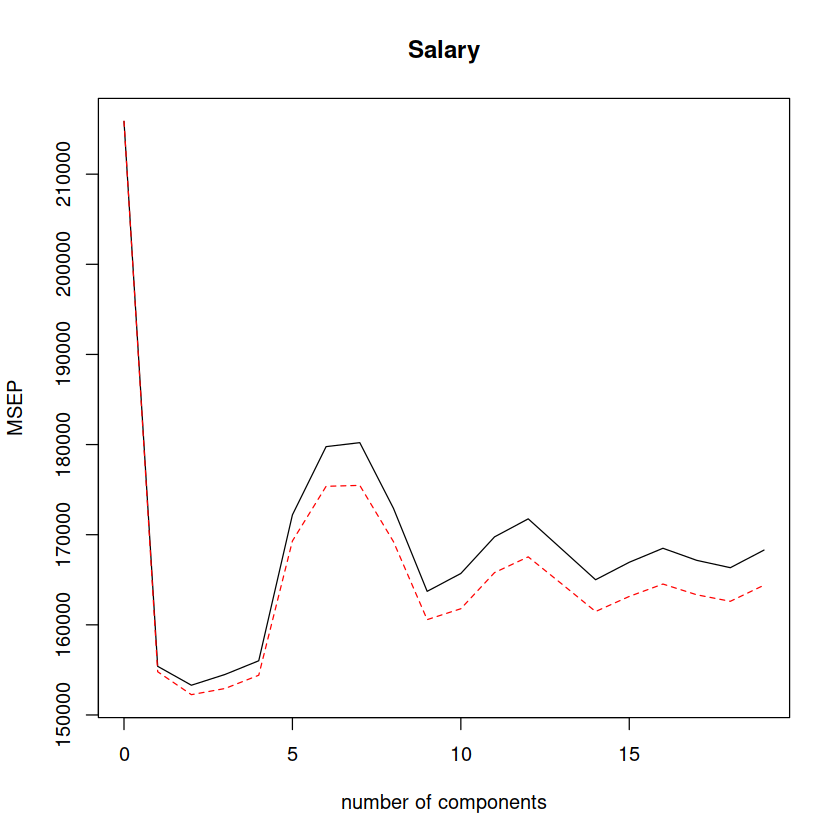

In [70]:
validationplot(pls.fit, val.type = "MSEP")

In [71]:
pls.pred <- predict(pls.fit, x[test, ], ncomp = 2)
mean((pls.pred - y.test)^2)

[1] 101417.5

In [72]:
plt.fit <- plsr(Salary ~ ., data = Hitters, scale = TRUE,
                ncomp = 2)
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

## Exercises

### Exercise 8

In [73]:
x <- rnorm(100)
eps <- rnorm(100)
y <- 1 + 2*x + 3*x^2 + 4*x^3 + eps
X <- data.frame(x=x, y=y)

In [74]:
regfit <- regsubsets(y ~ poly(x, 10), data = X)
summary(regfit)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10), data = X)
10 Variables  (and intercept)
              Forced in Forced out
poly(x, 10)1      FALSE      FALSE
poly(x, 10)2      FALSE      FALSE
poly(x, 10)3      FALSE      FALSE
poly(x, 10)4      FALSE      FALSE
poly(x, 10)5      FALSE      FALSE
poly(x, 10)6      FALSE      FALSE
poly(x, 10)7      FALSE      FALSE
poly(x, 10)8      FALSE      FALSE
poly(x, 10)9      FALSE      FALSE
poly(x, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)4 poly(x, 10)5
1  ( 1 ) "*"          " "          " "          " "          " "         
2  ( 1 ) "*"          "*"          " "          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          " "          " "         
5  ( 1 ) "*"          "*"          "*"          " "          " "         
6 

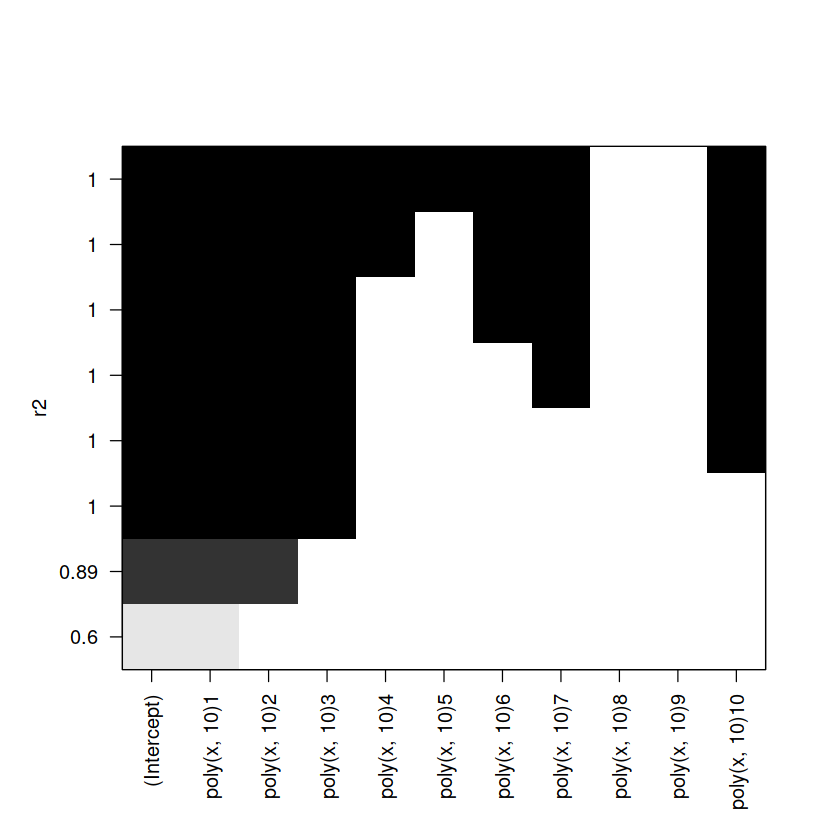

In [75]:
plot(regfit, scale = "r2")

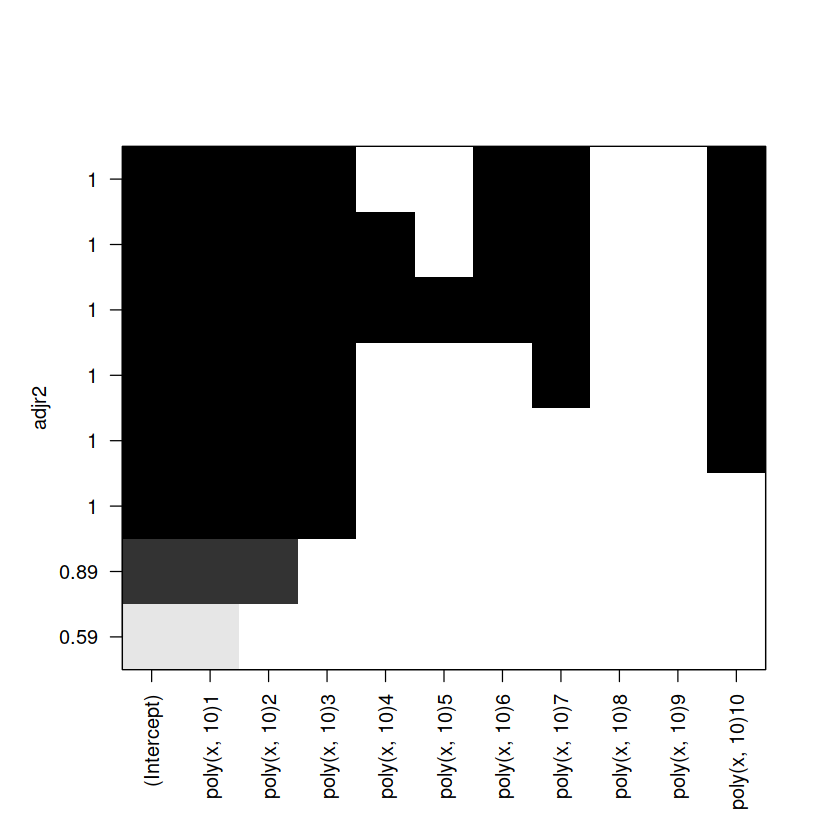

In [76]:
plot(regfit, scale = "adjr2")

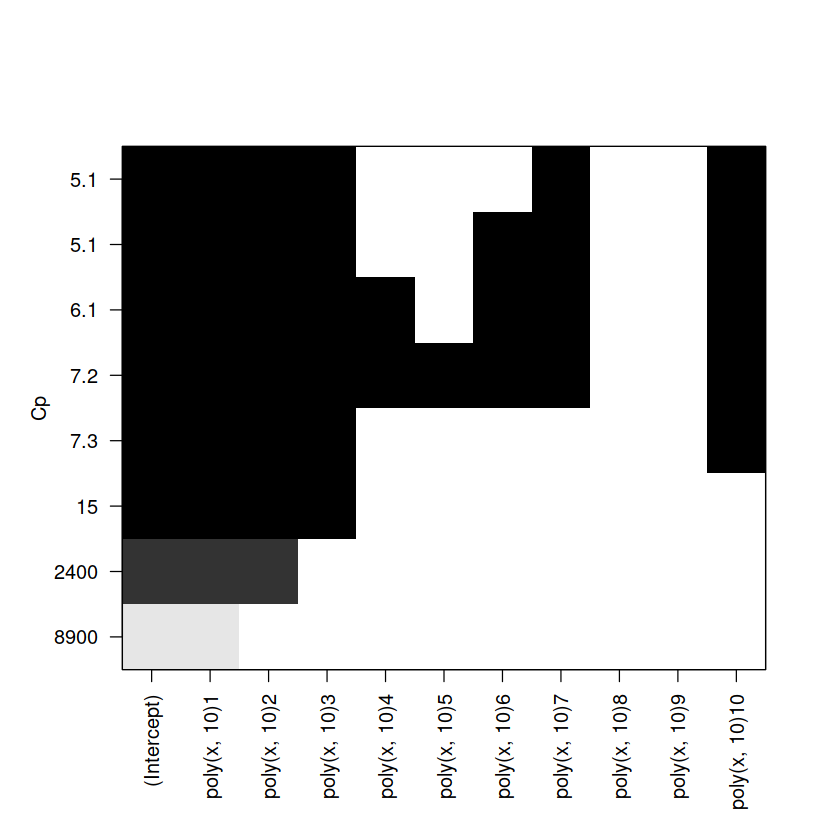

In [77]:
plot(regfit, scale = "Cp")

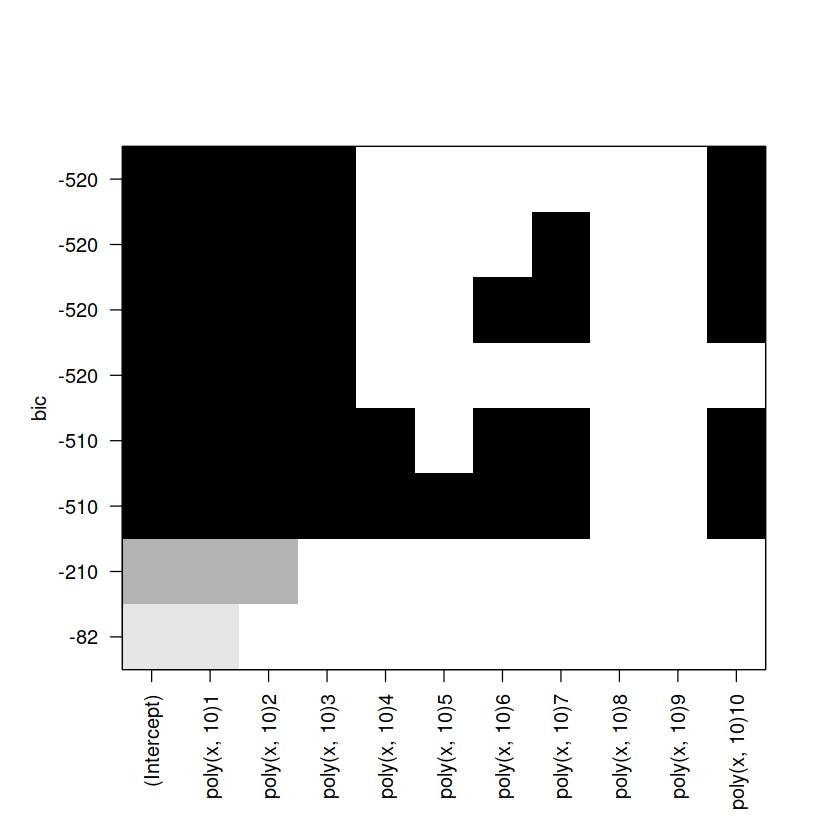

In [78]:
plot(regfit, scale = "bic")

Following the BIC selection, we got the model with quadractic and cubic terms.

In [79]:
coef(regfit, 3)

(Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    5.204181   114.097620    79.428786    48.227211

d) Repeat using forward stepwise selection.

In [80]:
regfit.fwd <- regsubsets(y ~ poly(x, 10), data = X,
                         method = "forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10), data = X, method = "forward")
10 Variables  (and intercept)
              Forced in Forced out
poly(x, 10)1      FALSE      FALSE
poly(x, 10)2      FALSE      FALSE
poly(x, 10)3      FALSE      FALSE
poly(x, 10)4      FALSE      FALSE
poly(x, 10)5      FALSE      FALSE
poly(x, 10)6      FALSE      FALSE
poly(x, 10)7      FALSE      FALSE
poly(x, 10)8      FALSE      FALSE
poly(x, 10)9      FALSE      FALSE
poly(x, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)4 poly(x, 10)5
1  ( 1 ) "*"          " "          " "          " "          " "         
2  ( 1 ) "*"          "*"          " "          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          " "          " "         
5  ( 1 ) "*"          "*"          "*"          " "        

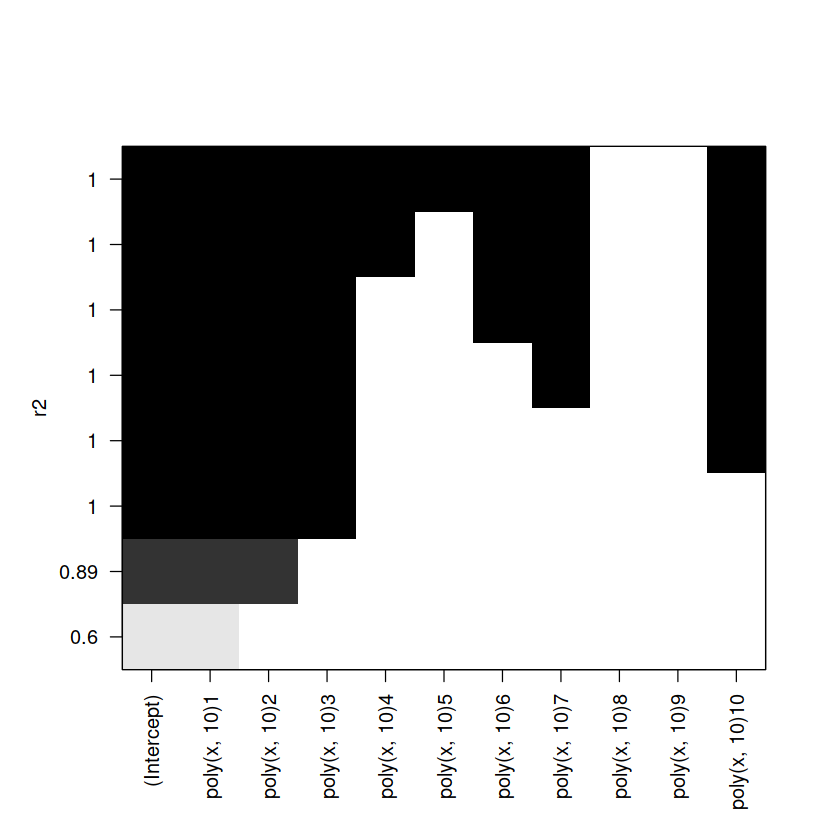

In [81]:
plot(regfit.fwd, scale = "r2")

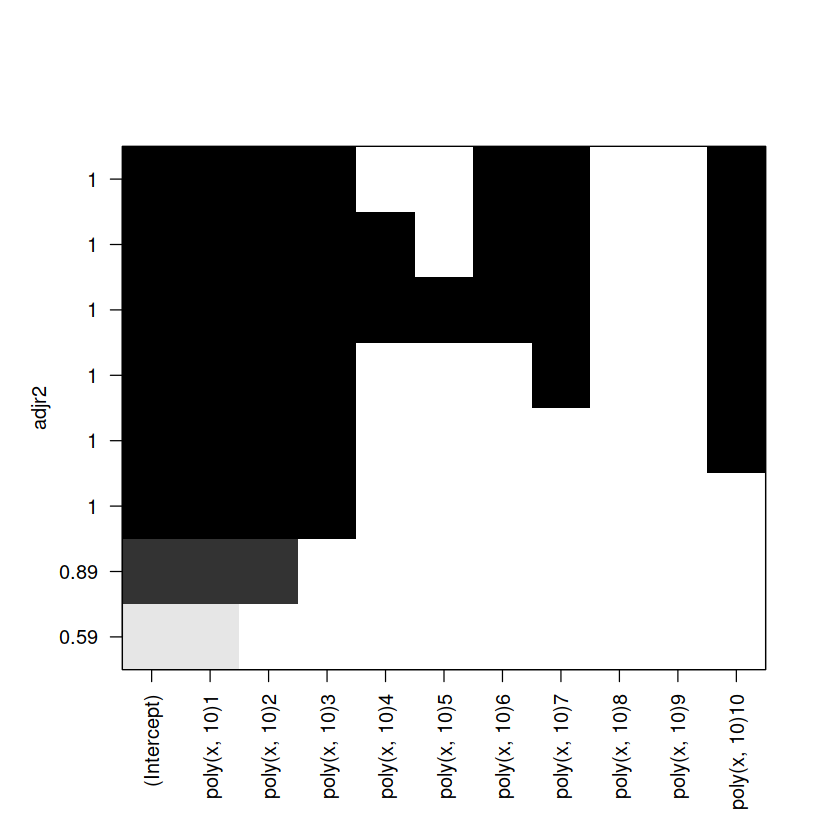

In [82]:
plot(regfit.fwd, scale = "adjr2")

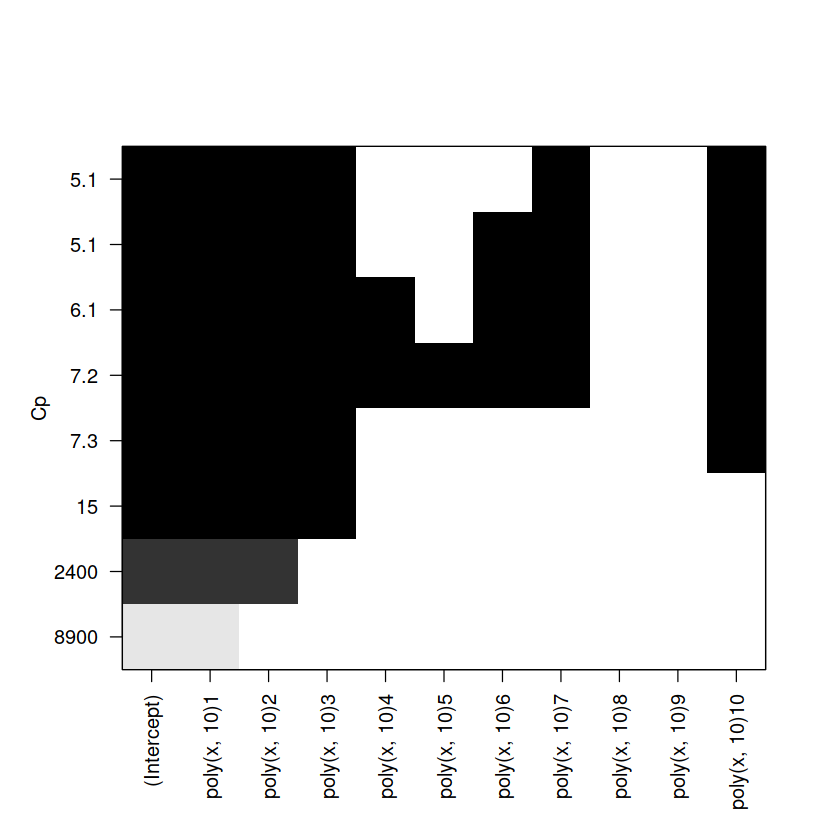

In [83]:
plot(regfit.fwd, scale = "Cp")

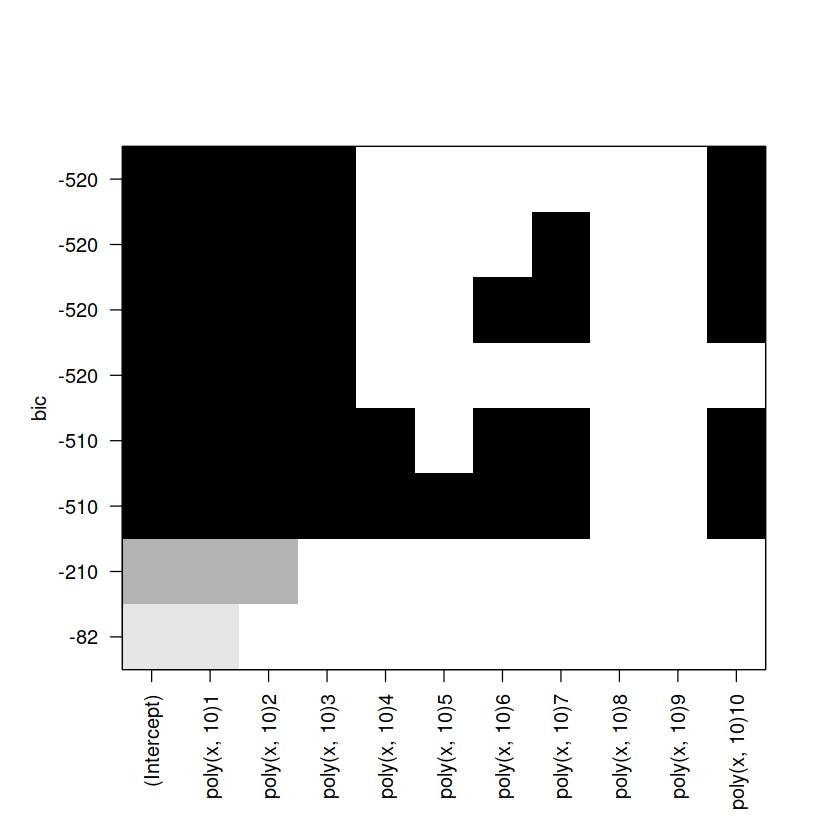

In [84]:
plot(regfit.fwd, scale = "bic")

Very similar results, if not identical.

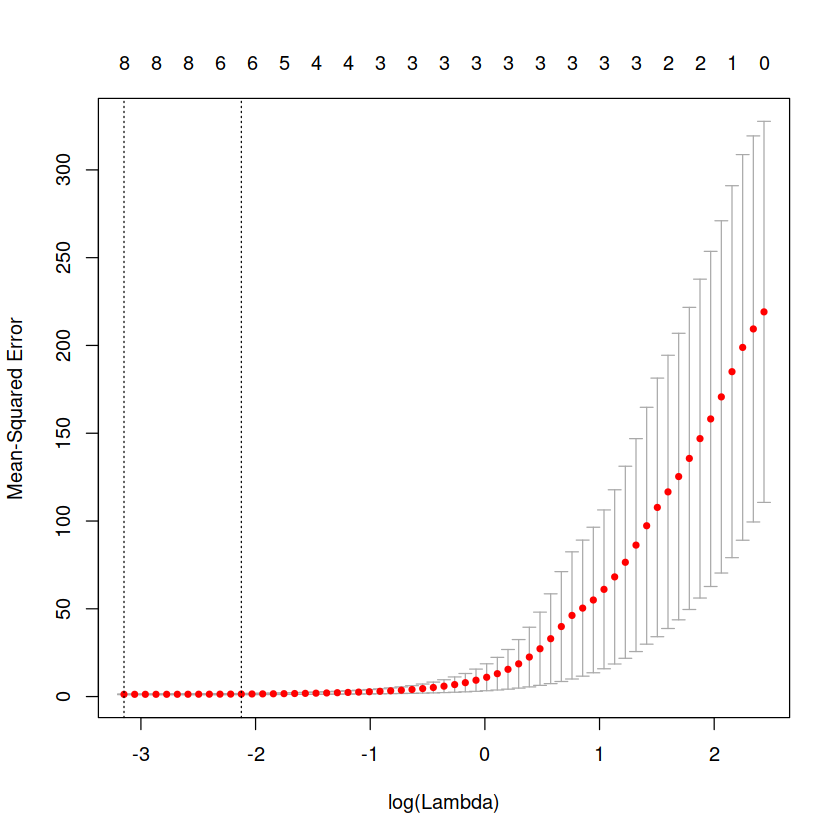

In [85]:
glm.x <- model.matrix(y ~ poly(x, 10), data = X)
glm.y <- y
cv.lasso <- cv.glmnet(glm.x, glm.y, alpha = 1)
plot(cv.lasso)

In [86]:
bestlam <- cv.lasso$lambda.min
bestlam

[1] 0.04295702

In [87]:
coef(cv.lasso, s = bestlam)

12 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)     5.2041813
(Intercept)     .        
poly(x, 10)1  113.6680500
poly(x, 10)2   78.9992159
poly(x, 10)3   47.7976407
poly(x, 10)4    0.5277155
poly(x, 10)5   -0.5200951
poly(x, 10)6   -0.9547423
poly(x, 10)7   -1.6098671
poly(x, 10)8    .        
poly(x, 10)9    .        
poly(x, 10)10   2.6315699

Quadractic and cubic terms are the largest one, but the minimum lambda didn’t actually zeroed the higher terms. I shall test the lambda.se.

In [88]:
cv.lasso$lambda.1se

[1] 0.1195305

In [89]:
coef(cv.lasso, s = cv.lasso$lambda.1se)

12 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)     5.2041813
(Intercept)     .        
poly(x, 10)1  112.9023156
poly(x, 10)2   78.2334814
poly(x, 10)3   47.0319063
poly(x, 10)4    .        
poly(x, 10)5    .        
poly(x, 10)6   -0.1890078
poly(x, 10)7   -0.8441326
poly(x, 10)8    .        
poly(x, 10)9    .        
poly(x, 10)10   1.8658355

Now only quadractic and cubic terms are non-zero.

f) Now generate another response vector and perform subset and the lasso.

In [90]:
y <- 1 + 8*x^7 + eps
X <- data.frame(x=x, y=y)

In [91]:
regfit <- regsubsets(y ~ poly(x, 10), data = X)

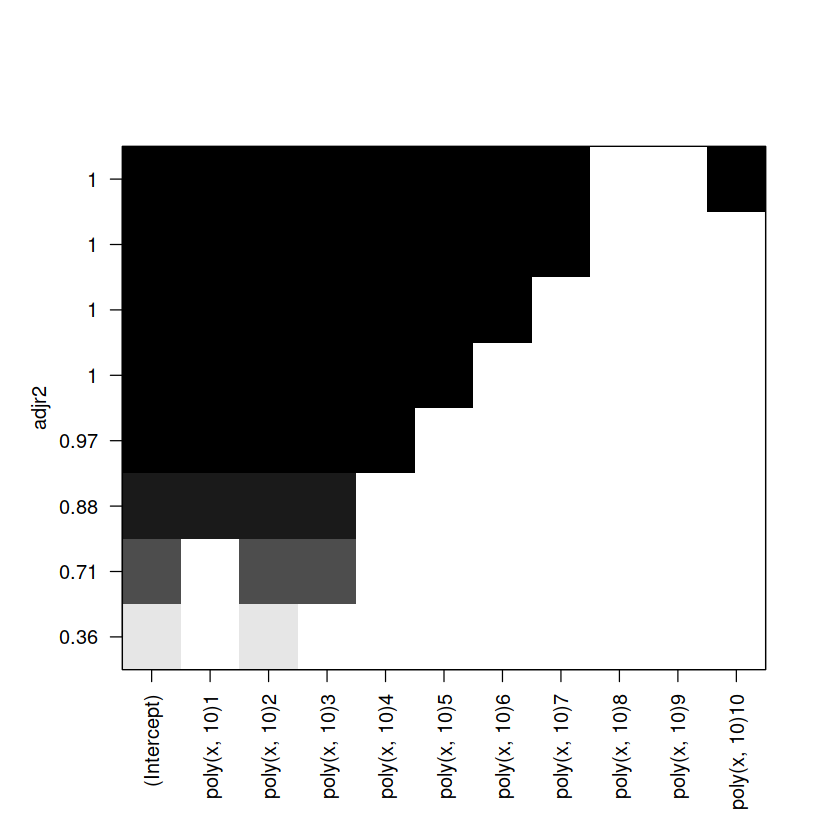

In [92]:
plot(regfit, scale = "adjr2")

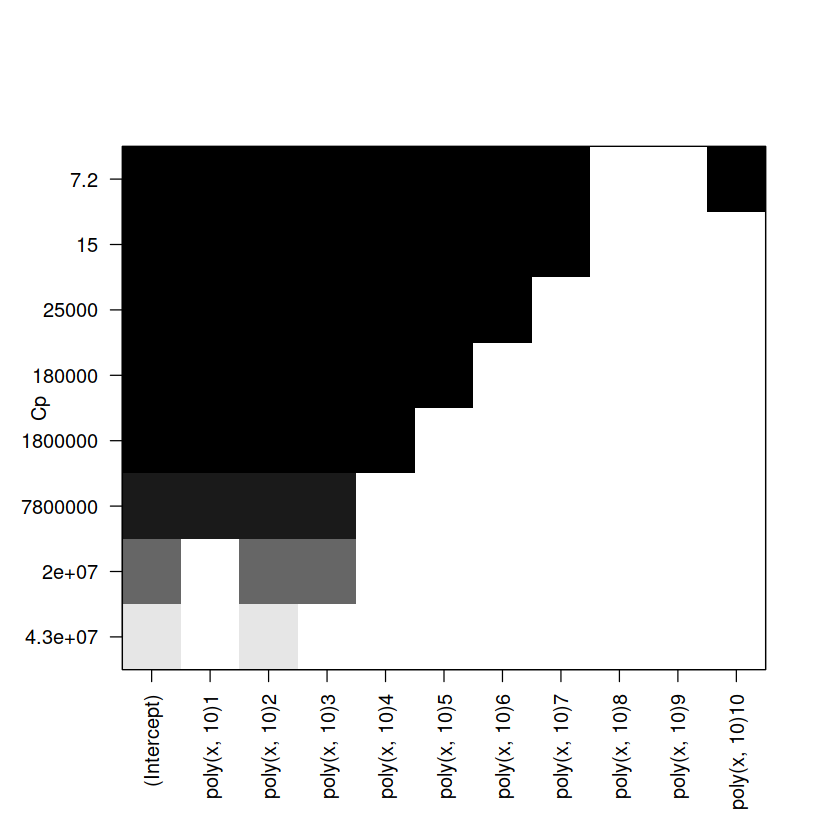

In [93]:
plot(regfit, scale = "Cp")

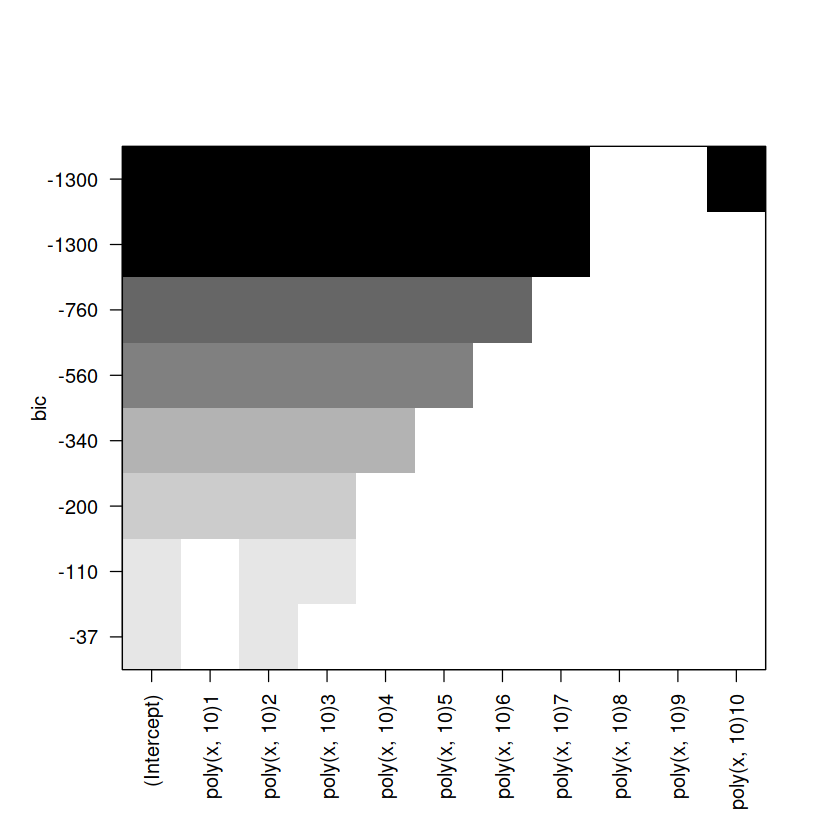

In [94]:
plot(regfit, scale = "bic")

In [95]:
data.frame(coef(regfit, 7))

,coef.regfit..7.
(Intercept),118.5628
"poly(x, 10)1",3414.5765
"poly(x, 10)2",4957.5115
"poly(x, 10)3",4796.3695
"poly(x, 10)4",2401.3538
"poly(x, 10)5",1260.2368
"poly(x, 10)6",393.4230
"poly(x, 10)7",157.2548


The lasso.

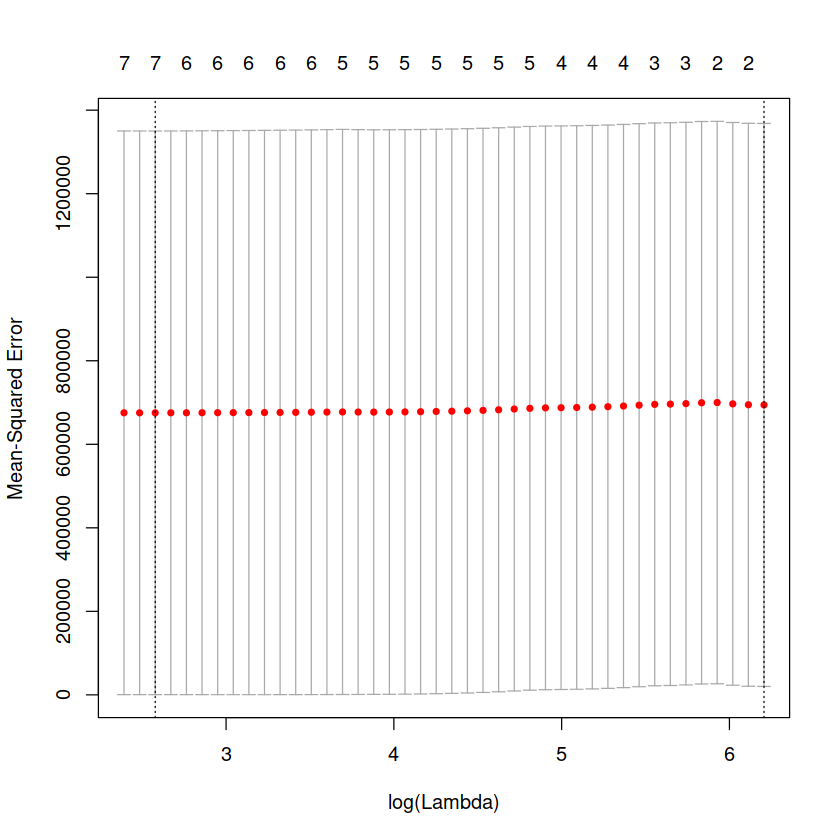

In [96]:
glm.x <- model.matrix(y ~ poly(x, 10), data = X)
glm.y <- y

cv.lasso <- cv.glmnet(glm.x, glm.y, alpha = 1)
plot(cv.lasso)

In [97]:
bestlam <- cv.lasso$lambda.min
bestlam

[1] 13.16759

In [98]:
coef(cv.lasso, s = bestlam)

12 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)    118.5628
(Intercept)      .     
poly(x, 10)1  3282.9006
poly(x, 10)2  4825.8356
poly(x, 10)3  4664.6936
poly(x, 10)4  2269.6780
poly(x, 10)5  1128.5610
poly(x, 10)6   261.7471
poly(x, 10)7    25.5789
poly(x, 10)8     .     
poly(x, 10)9     .     
poly(x, 10)10    .     

In [99]:
coef(cv.lasso, s = cv.lasso$lambda.1se)

12 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept)   118.5628
(Intercept)     .     
poly(x, 10)1    .     
poly(x, 10)2    .     
poly(x, 10)3    .     
poly(x, 10)4    .     
poly(x, 10)5    .     
poly(x, 10)6    .     
poly(x, 10)7    .     
poly(x, 10)8    .     
poly(x, 10)9    .     
poly(x, 10)10   .     

Now, the lambda with minimum error returns a $x^7$ term, but the `lambda.1se`, which was the better option before, now zeroes $x^6$ and $x^7$, yielding a wrong model.

### Exercise 9

In [100]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [101]:
dim(College)

[1] 777  18

In [102]:
train <- sample(nrow(College), nrow(College) / 2)
test <- -train

In [103]:
lm.fit <- lm(Apps ~ ., data = College, subset = train)
summary(lm.fit)


Call:
lm(formula = Apps ~ ., data = College, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5233.1  -512.0   -36.1   412.4  6699.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -522.11744  652.49409  -0.800 0.424116    
PrivateYes  -530.09096  219.84300  -2.411 0.016386 *  
Accept         1.67795    0.05331  31.474  < 2e-16 ***
Enroll        -1.28189    0.25093  -5.108 5.21e-07 ***
Top10perc     74.77847    8.78811   8.509 4.42e-16 ***
Top25perc    -24.34721    6.98595  -3.485 0.000551 ***
F.Undergrad    0.09456    0.04563   2.072 0.038929 *  
P.Undergrad    0.04682    0.04345   1.078 0.281919    
Outstate      -0.09374    0.03041  -3.082 0.002208 ** 
Room.Board     0.21882    0.08051   2.718 0.006883 ** 
Books          0.14789    0.40359   0.366 0.714245    
Personal       0.13374    0.10788   1.240 0.215876    
PhD          -12.20235    8.02416  -1.521 0.129189    
Terminal      -2.63779    8.68765  -0.304 0.761584    
S.F.

In [104]:
pred <- predict(lm.fit, College[test, ])
lm.mse <- mean((pred - y.test)^2)
lm.mse

Warning message in pred - y.test:
“longer object length is not a multiple of shorter object length”

[1] 13705153

In [105]:
glm.x <- model.matrix(Apps ~ ., data = College)
glm.y <- College$Apps
glm.fit <- cv.glmnet(glm.x[train, ], glm.y[train], alpha = 0)

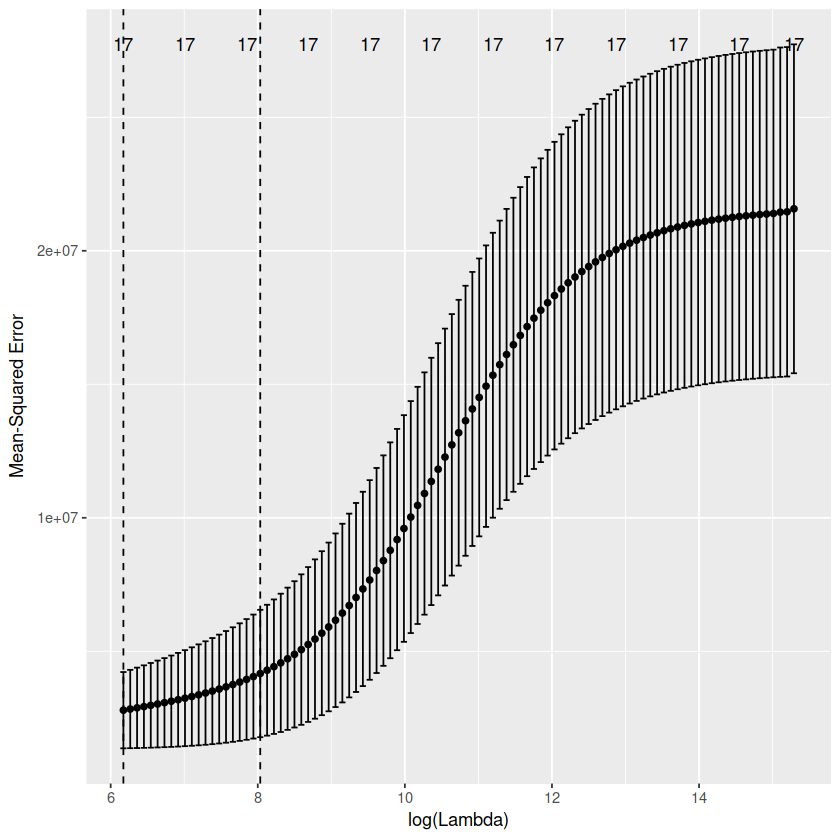

In [106]:
autoplot(glm.fit)

In [107]:
bestlam <- glm.fit$lambda.min
bestlam

[1] 479.5869

In [108]:
coef(glm.fit, bestlam)

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -2.029145e+03
(Intercept)  .           
PrivateYes  -6.192547e+02
Accept       1.032519e+00
Enroll       3.302104e-01
Top10perc    3.496413e+01
Top25perc   -1.500801e+00
F.Undergrad  7.639008e-02
P.Undergrad  2.285766e-02
Outstate    -1.908791e-02
Room.Board   2.548616e-01
Books        2.973670e-01
Personal     6.343825e-02
PhD         -4.914136e+00
Terminal    -4.595000e+00
S.F.Ratio    2.063569e+01
perc.alumni -8.558596e+00
Expend       6.631775e-02
Grad.Rate    1.254310e+01

In [109]:
pred <- predict(glm.fit, glm.x[test, ], s = bestlam)
ridge.mse <- mean((pred - College[test, ]$Apps)^2)
ridge.mse

[1] 785531.5

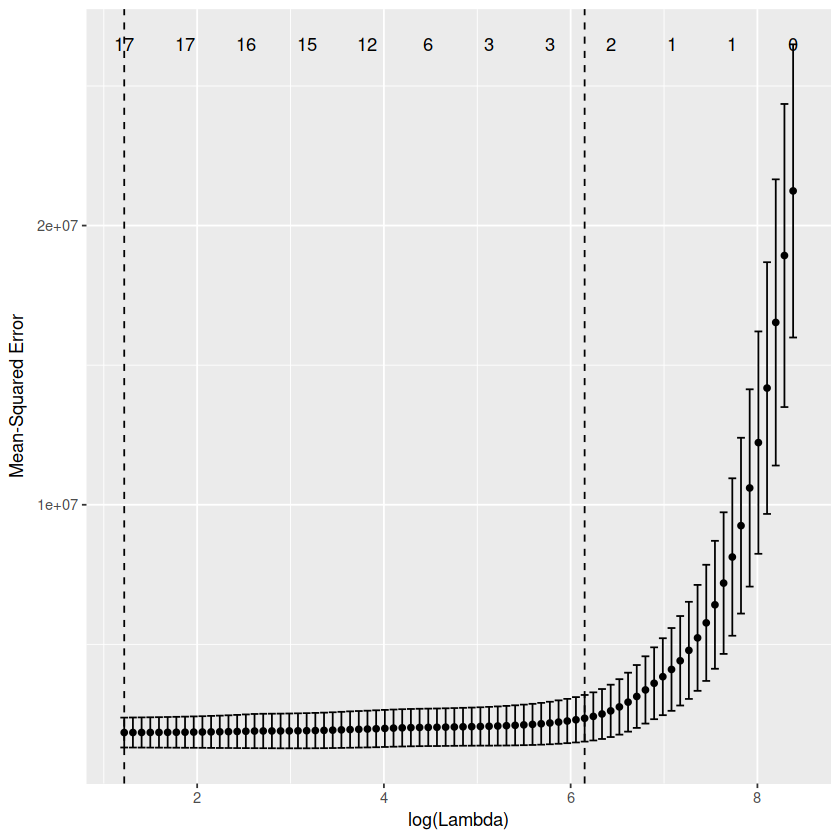

In [110]:
glm.fit <- cv.glmnet(glm.x[train, ], glm.y[train], alpha = 1)
autoplot(glm.fit)

In [111]:
bestlam <- glm.fit$lambda.min
bestlam

[1] 3.383391

In [112]:
coef(glm.fit, bestlam)

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -571.65625366
(Intercept)    .         
PrivateYes  -519.30687096
Accept         1.65886822
Enroll        -1.12560068
Top10perc     72.10371708
Top25perc    -22.19861763
F.Undergrad    0.07275309
P.Undergrad    0.04723423
Outstate      -0.08914661
Room.Board     0.21086195
Books          0.13341198
Personal       0.12985739
PhD          -12.08906908
Terminal      -1.92483300
S.F.Ratio     20.11207651
perc.alumni    1.46872319
Expend         0.05740046
Grad.Rate      5.71759296

In [113]:
pred <- predict(glm.fit, glm.x[test, ], s = bestlam)
lasso.mse <- mean((pred - College[test, ]$Apps)^2)
lasso.mse

[1] 879309.4

In [114]:
data.frame(
    lm = lm.mse,
    ridge = ridge.mse,
    lasso = lasso.mse
)

lm,ridge,lasso
13705153,785531.5,879309.4


The lasso improved the MSE error, and set a few variables’ coefficients to zero: **Enroll**, **F.Undergrad**, and **S.F.Ratio**.

e) Fit a PCR model.

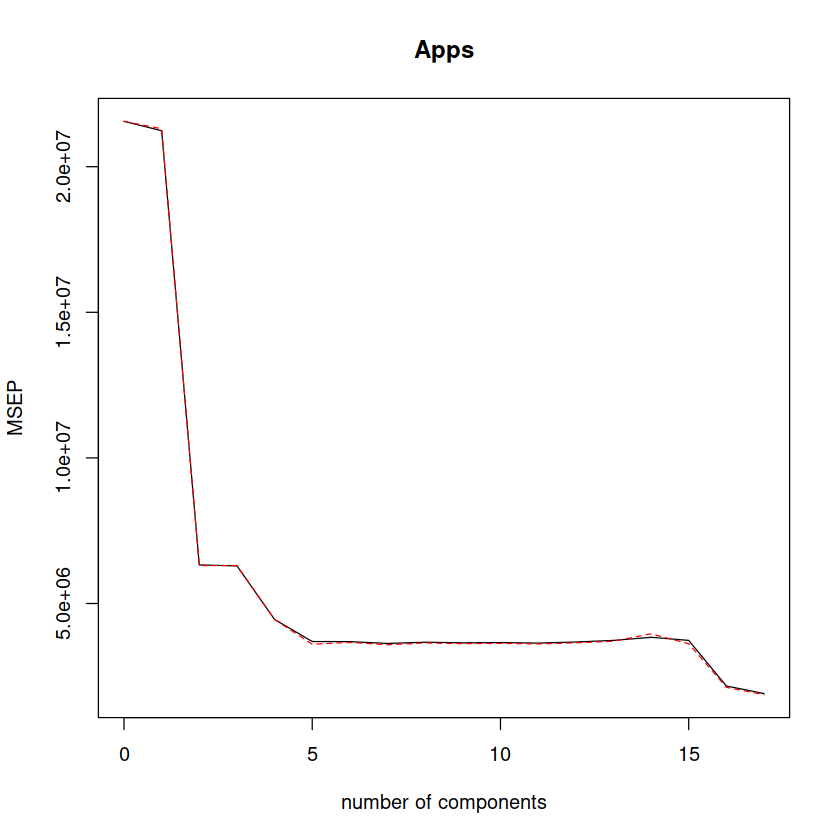

In [115]:
set.seed(1)
pcr.fit <- pcr(Apps ~ ., data = College, subset = train,
               scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type = "MSEP")

In [116]:
summary(pcr.fit)

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4643     4608     2515     2508     2110     1922     1921
adjCV         4643     4616     2510     2511     2110     1897     1914
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1905     1916     1910      1912      1908      1918      1932
adjCV     1893     1909     1903      1905      1900      1910      1924
       14 comps  15 comps  16 comps  17 comps
CV         1959      1932      1472      1380
adjCV      1990      1902      1456      1367

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      32.122    58.58    65.52    71.07    76.24    80.96    84.51    87.99
Apps    2.806    71.67    71.91    80.71    84.03    84.37    84.71    84.7

In [117]:
pcr.pred <- predict(pcr.fit, College[test, ], ncomp = 17)
pcr.mse <- mean((pcr.pred - College[test, ]$Apps)^2)
pcr.mse

[1] 900522

In [118]:
data.frame(
    lm = lm.mse,
    ridge = ridge.mse,
    lasso = lasso.mse,
    pcr = pcr.mse
)

lm,ridge,lasso,pcr
13705153,785531.5,879309.4,900522


In [119]:
set.seed(1)
pls.fit <- plsr(Apps ~ ., data = College, subset = train,
                scale = TRUE, validation = "CV")
summary(pls.fit)

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4643     2312     1951     1811     1777     1571     1470
adjCV         4643     2306     1949     1803     1735     1544     1451
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1432     1416     1390      1381      1380      1380      1378
adjCV     1416     1401     1376      1368      1367      1367      1365
       14 comps  15 comps  16 comps  17 comps
CV         1379      1379      1380      1380
adjCV      1366      1366      1367      1367

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.61    40.94    63.86    66.15    70.56    74.63    78.64    81.34
Apps    76.83    84.75    87.46    91.56    93.01    93.44    93.53    

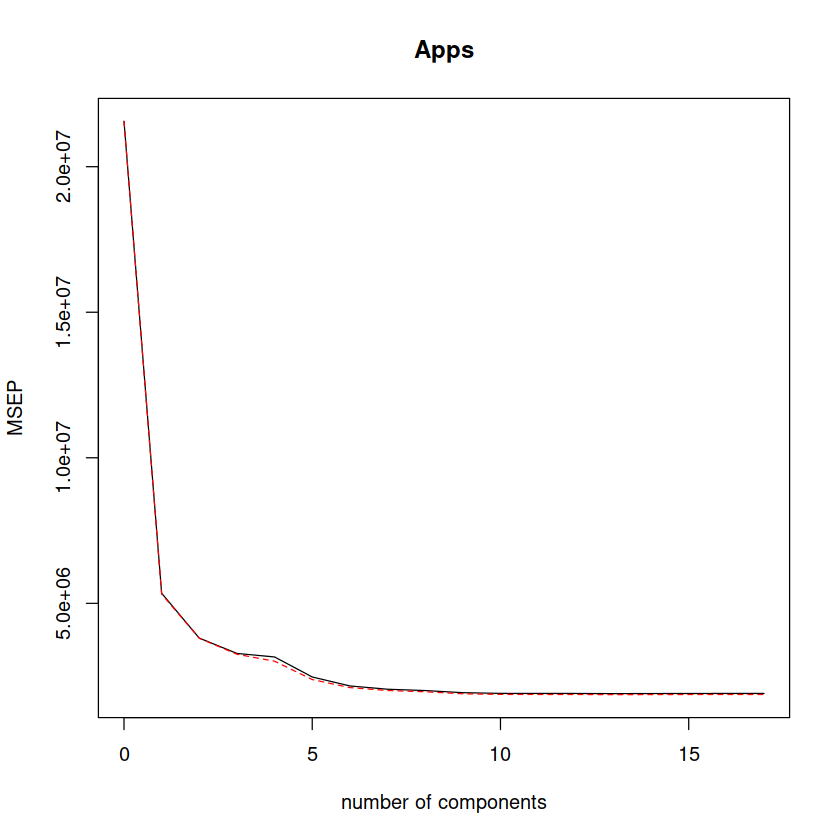

In [120]:
validationplot(pls.fit, val.type = "MSEP")

In [121]:
pls.pred <- predict(pls.fit, College[test, ], ncomp = 15)
pls.mse <- mean((pls.pred - College[test, ]$Apps)^2)
pls.mse

[1] 900664.2

In [122]:
data.frame(
    lm = lm.mse,
    ridge = ridge.mse,
    lasso = lasso.mse,
    pcr = pcr.mse,
    pls = pls.mse
)

lm,ridge,lasso,pcr,pls
13705153,785531.5,879309.4,900522,900664.2


In [123]:
data.frame(
    lm = sqrt(lm.mse),
    ridge = sqrt(ridge.mse),
    lasso = sqrt(lasso.mse),
    pcr = sqrt(pcr.mse),
    pls = sqrt(pls.mse)
)

lm,ridge,lasso,pcr,pls
3702.047,886.3021,937.715,948.9584,949.0333


On average, the best model errors the number of applications by 1235 applications. The PLS (Partial Least Squares) gave the best MSE error with 15 components, followed by PCR (Principal Component Analysis) and the lasso. The linear model with least squares was the worst with a huge error of on average 5.500. The Ridge reduced the error significantly, but others were way better. Any of the lasso, PCR and PLS are good.

The lasso is particularly the best option for me, because its error it very similar to other models, while I can interpret its coefficients, which is not possible with PCR or PLS.

### Exercise 10

Generate $p = 20$ features with $n = 1000$ observations following
$$
Y = X\beta + \epsilon,
$$
where $\beta$ has some elements that are exactly equal to zero.

In [124]:
X <- data.frame(matrix(rnorm(1000 * 20), ncol = 20))
eps <- rnorm(1000)
set.seed(1)
beta <- array(c(round(sort(runif(15) * 3), 1), rep(0, 5)))
y <- as.matrix(X) %*% beta + eps

In [125]:
t(beta)

0.2,0.5,0.6,0.6,0.8,1.1,1.2,1.7,1.9,2,2.1,2.3,2.7,2.7,2.8,0,0,0,0,0


The following betas are zero:

In [126]:
which(beta == 0)

[1] 16 17 18 19 20

In [127]:
set.seed(1)
data <- cbind(y, X)
train <- sample(nrow(X), 100)
test <- -train

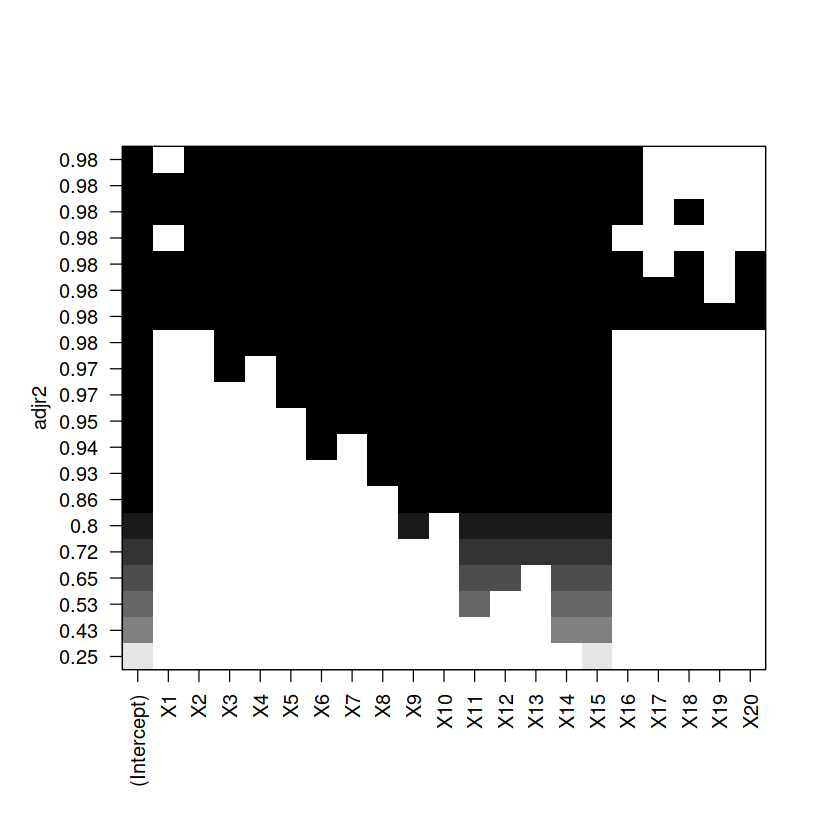

In [128]:
regfit <- regsubsets(y ~ ., data = data, subset = train, nvmax = 20)
plot(regfit, scale = "adjr2")

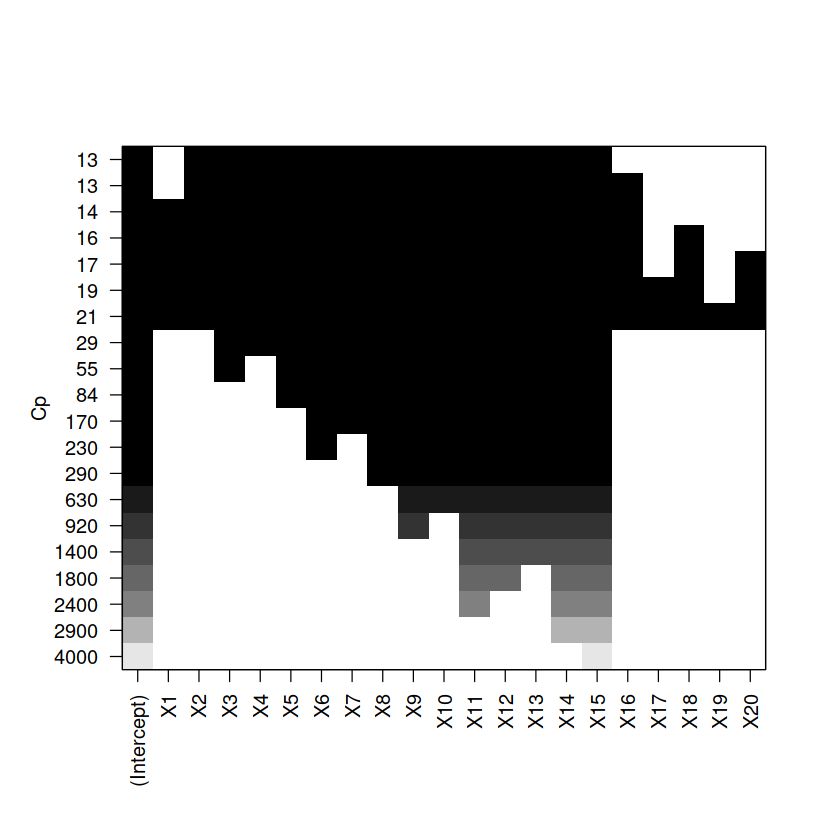

In [129]:
plot(regfit, scale = "Cp")

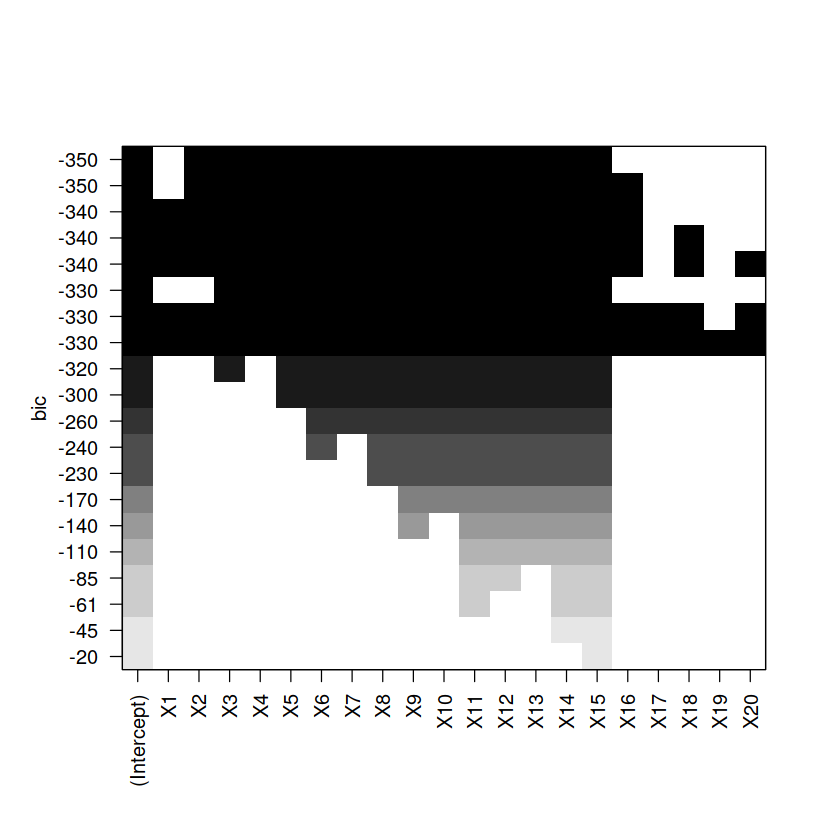

In [130]:
plot(regfit, scale = "bic")

In [131]:
data.frame(coef(regfit, 15))

,coef.regfit..15.
(Intercept),0.1215079
X2,0.5160258
X3,0.6233251
X4,0.6420086
X5,0.9963545
X6,0.9732720
X7,1.1921145
X8,1.6136267
X9,1.9710252
X10,2.1305379


In [132]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

In [133]:
rlist <- c()

for (i in 1:20) {
    pred <- predict(regfit, data[train, ], i)
    r <- data.frame(
        group = "train",
        nvar = i,
        mse = mean((y[train] - pred)^2)
    )
    rlist <- rbind(rlist, r)
}

for (i in 1:20) {
    pred <- predict(regfit, data[test, ], i)
    r <- data.frame(
        group = "test",
        nvar = i,
        mse = mean((y[test] - pred)^2)
    )
    rlist <- rbind(rlist, r)
}

result <- rlist

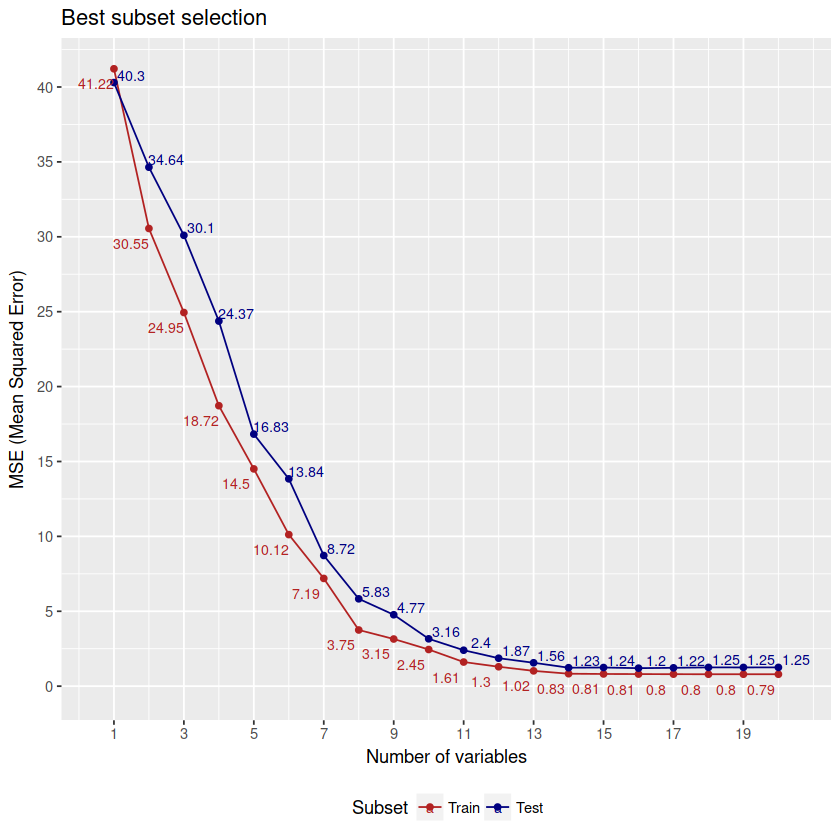

In [134]:
ggplot(result, aes(nvar, mse, colour = group)) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = round(mse, 2)), size = 3,
              nudge_y = ifelse(result$group == "train", -1, 0.5),
              nudge_x = ifelse(result$group == "train", -0.5, 0.5)) +
    scale_x_continuous(breaks = seq(1, 20, 2)) +
    scale_y_continuous(breaks = seq(0, 40, 5)) +
    scale_colour_manual(
        "Subset",
        values = c("firebrick", "navyblue"),
        labels = c("Train", "Test")) +
    xlab("Number of variables") +
    ylab("MSE (Mean Squared Error)") +
    ggtitle("Best subset selection") +
    theme(legend.position = "bottom")

For both train and test subsets the model with the best subset of variables contains 14 variables.

In [135]:
betas <- data.frame(beta)
row.names(betas) <- c(names(X))

In [136]:
rownames_to_column(betas) %>%
full_join(rownames_to_column(data.frame(reg = coef(regfit, 16))))

Joining, by = "rowname"


rowname,beta,reg
X1,0.2,0.1017066
X2,0.5,0.5135899
X3,0.6,0.6251028
X4,0.6,0.6639137
X5,0.8,0.9910166
X6,1.1,0.9691865
X7,1.2,1.1912038
X8,1.7,1.6246247
X9,1.9,1.9653002
X10,2.0,2.0966671


Except for **X19** and **Intercept** the model could approximate the data correctly. The most distant coefficients are **X8** and **X7**.

In [137]:
result <-
foreach(i = 1:20, .combine = "rbind") %do% {
    coefi <- data.frame(reg = coef(regfit, i))
    coefi <-
        rownames_to_column(betas) %>%
        full_join(rownames_to_column(coefi), by = "rowname")
    mse <- sqrt(mean((coefi$beta - coefi$reg)^2, na.rm = TRUE))
    data.frame(nvar = i, mse = mse)
}

Warning message:
“Removed 2 rows containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_text).”

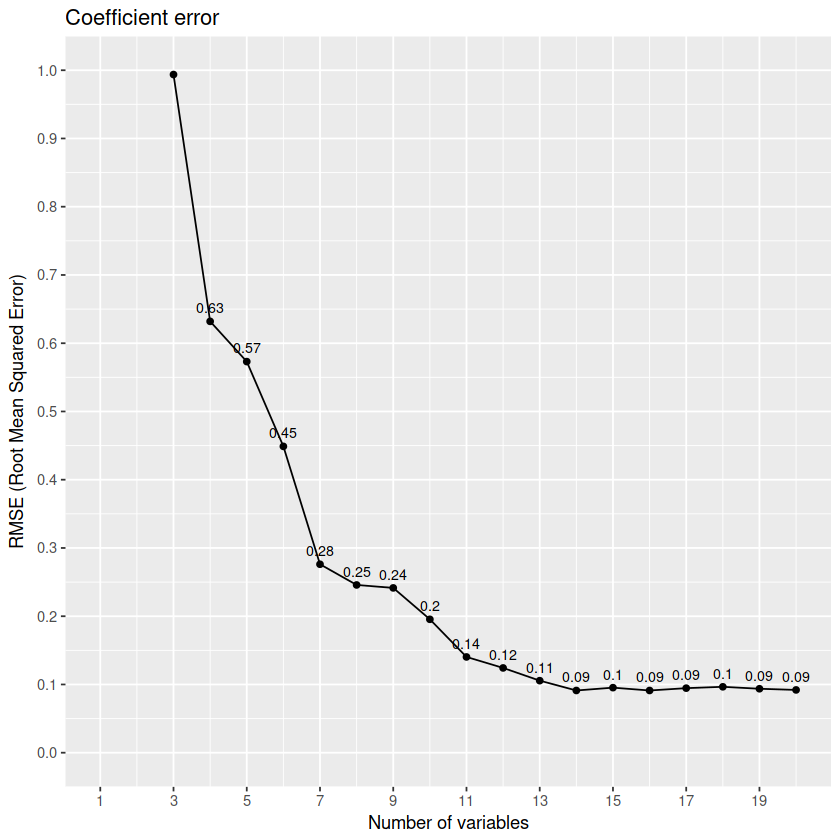

In [138]:
ggplot(result, aes(nvar, mse)) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = round(mse, 2)),
              size = 3, nudge_y = 0.02) +
    scale_x_continuous(breaks = seq(1, 20, 2)) +
    scale_y_continuous(limit = c(0, 1),
                       breaks = seq(0, 1, 0.1)) +
    xlab("Number of variables") +
    ylab("RMSE (Root Mean Squared Error)") +
    ggtitle("Coefficient error")

With fewer coefficients the distance is lower, but that does not correlate with the train nor the test error.  It peaks at 5 variables, reaching its minimum RMSE at 14 variables.  With we look the test MSE, the minimum is reached at 16 variables.

### Exercise 11

Try to predict per capita crime rate in the **Boston** data set.

In [139]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [140]:
train <- sample(nrow(Boston), nrow(Boston) / 2)
test <- -train

First, I will get the error with a linear model over all the features.

In [141]:
lm.fit <- lm(crim ~ ., data = Boston, subset = train)
pred <- predict(lm.fit, Boston[test, ])
lm.mse <- mean((Boston[test, ]$crim - pred)^2)
lm.mse

[1] 38.19

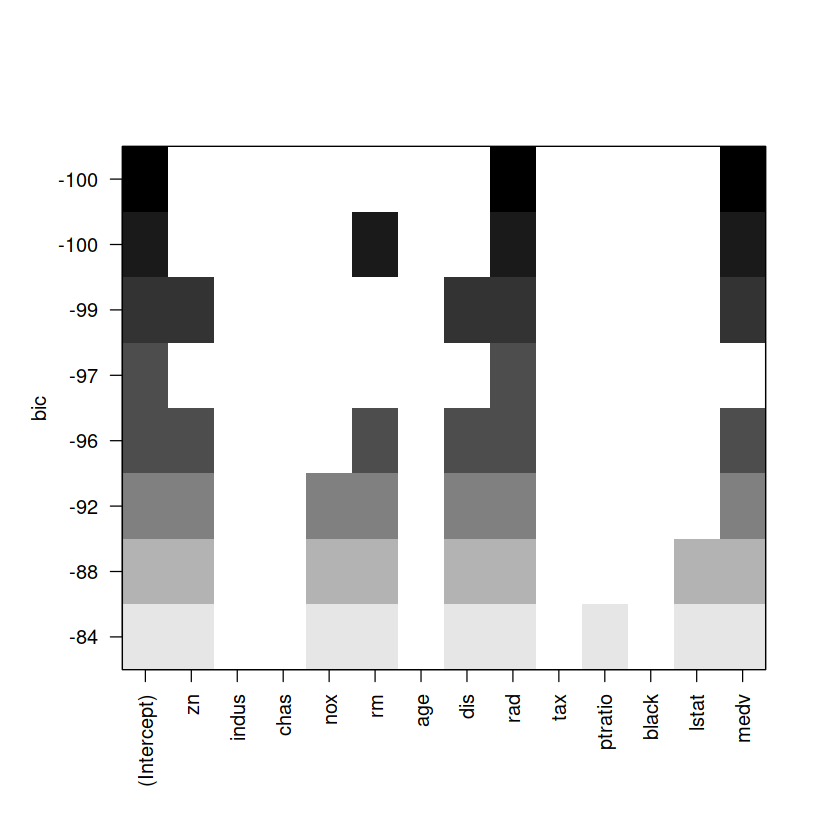

In [142]:
regfit <- regsubsets(crim ~ ., data = Boston, subset = train)
plot(regfit)

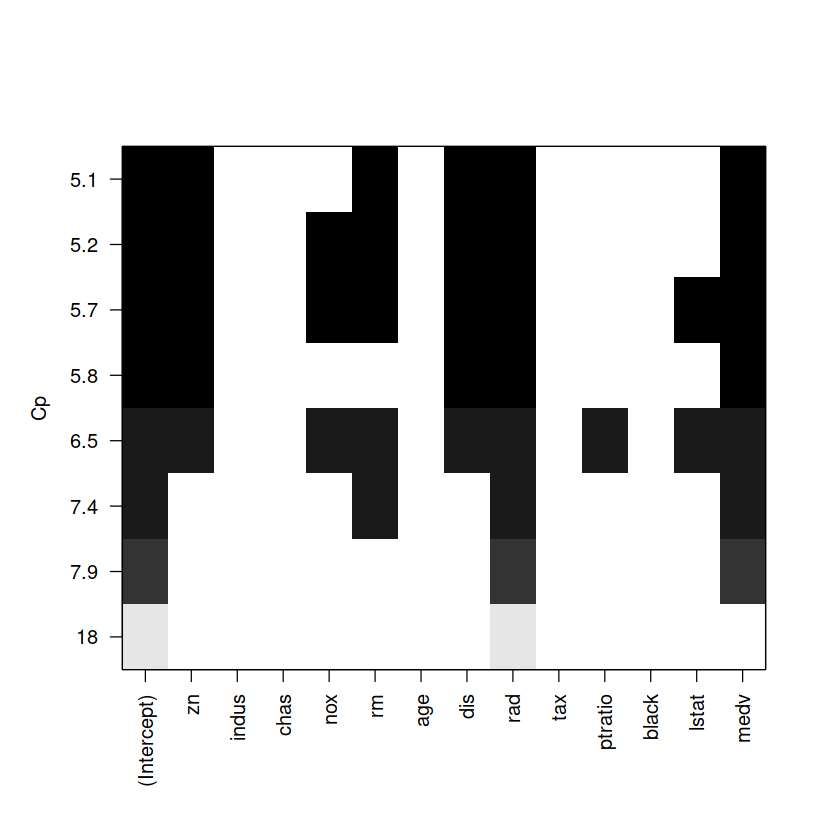

In [143]:
plot(regfit, scale = "Cp")

I’ll see the test error selecting with Bayesian Informatin Criterion and than with Mallows’s $C_p$.

In [144]:
pred <- predict(regfit, Boston[test, ], 3)
bic.mse <- mean((Boston[test, ]$crim - pred)^2)
bic.mse

[1] 38.71669

In [145]:
pred <- predict(regfit, Boston[test, ], 6)
cp.mse <- mean((Boston[test, ]$crim - pred)^2)
cp.mse

[1] 37.40458

With BIC selection, the error is worse than a linear model with all the features. Conversely, with Mallows’s $C_p$, we get six variables and a better error.

Now I will try Ridge Regression.

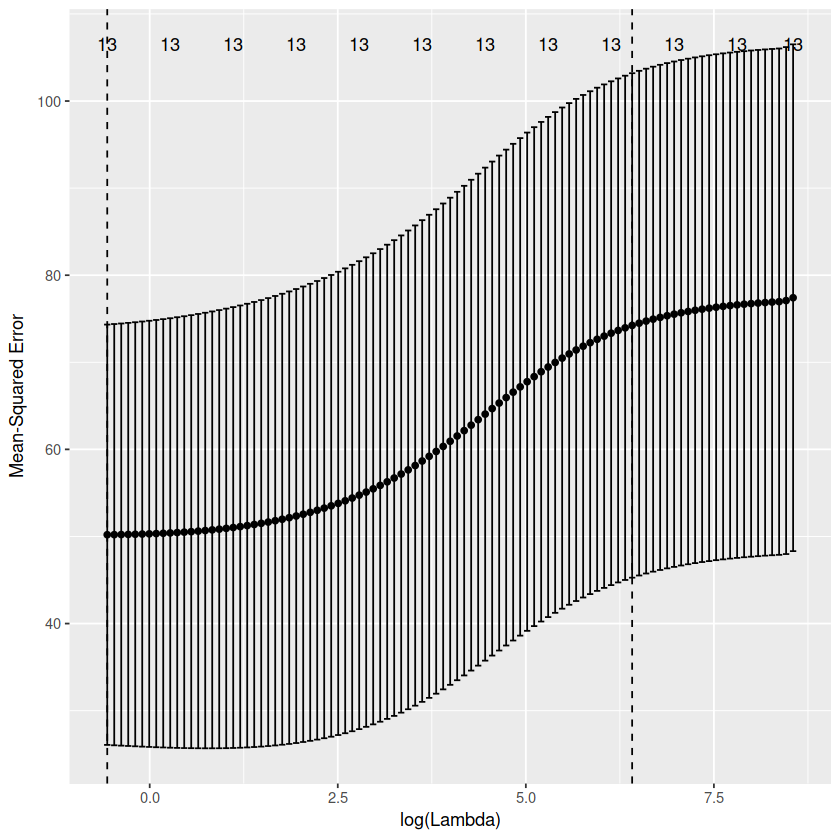

In [146]:
glm.x <- model.matrix(crim ~ ., data = Boston)
glm.y <- Boston$crim
cv.ridge <- cv.glmnet(glm.x[train, ], glm.y[train], alpha = 0)
autoplot(cv.ridge)

In [147]:
bestlam <- cv.ridge$lambda.min
bestlam

[1] 0.5686614

In [148]:
pred <- predict(cv.ridge, glm.x[test, ], s = bestlam)
ridge.mse <- mean((Boston[test, ]$crim - pred)^2)
ridge.mse

[1] 37.43973

The error is a bit worse than the model selected with Mallows’s $C_p$. Let’s see the coefficients for that lambda.

In [149]:
coef(cv.ridge, s = bestlam)

15 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.699286117
(Intercept)  .          
zn           0.037073866
indus       -0.066532729
chas        -1.281735799
nox         -4.722087684
rm           1.321510205
age         -0.011975363
dis         -0.867784756
rad          0.429611550
tax          0.003879292
ptratio     -0.136686357
black        0.002470351
lstat        0.164553146
medv        -0.195276987

Let’s also check whether the **lambda.1se** is good on the test.

In [150]:
pred <- predict(cv.ridge, glm.x[test, ], s = cv.ridge$lambda.1se)
ridge.mse2 <- mean((Boston[test, ]$crim - pred)^2)
ridge.mse2

[1] 66.57876

It’s not, therefore I will simply ignore it.

Moving on to the lasso.

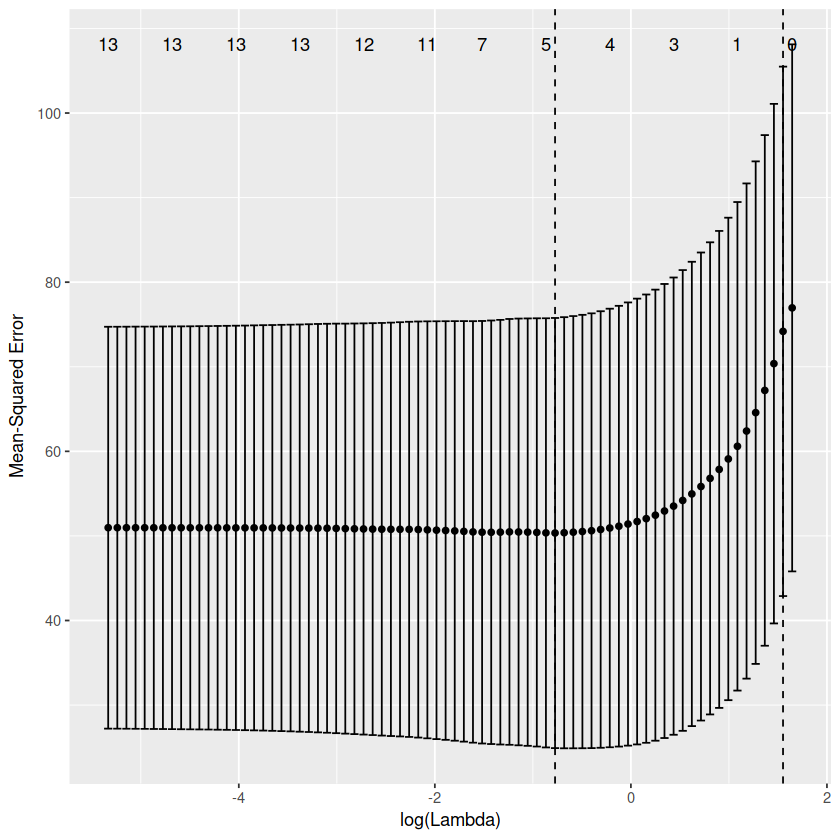

In [151]:
cv.lasso <- cv.glmnet(glm.x[train, ], glm.y[train], alpha = 1)
autoplot(cv.lasso)

In [152]:
bestlam <- cv.lasso$lambda.min
bestlam

[1] 0.4612588

In [153]:
pred <- predict(cv.lasso, glm.x[test, ], s = bestlam)
lasso.mse <- mean((Boston[test, ]$crim - pred)^2)
lasso.mse

[1] 37.82271

The error is higher than the one we obtained with the Ridge, but let’s check the coefficients.

In [154]:
coef(cv.lasso, s = bestlam)

15 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  0.79850358
(Intercept)  .         
zn           .         
indus        .         
chas         .         
nox          .         
rm           .         
age          .         
dis         -0.12896261
rad          0.46826187
tax          .         
ptratio      .         
black        .         
lstat        0.07156943
medv        -0.09712558

The lasso didn’t remove any variable.

Let’s try now PCR and PLS.

In [155]:
set.seed(2)
pcr.fit <- pcr(crim ~ ., data = Boston[train, ], scale = TRUE,
               validation = "CV")
summary(pcr.fit)

Data: 	X dimension: 253 13 
	Y dimension: 253 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            8.82    7.625    7.624    7.279    7.299    7.294    7.283
adjCV         8.82    7.621    7.620    7.270    7.291    7.288    7.273
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       7.301    7.291    7.273     7.266     7.284      7.17     7.094
adjCV    7.288    7.271    7.254     7.233     7.265      7.15     7.074

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       46.20    58.26    67.77    75.37    82.30    87.76    90.99    93.27
crim    26.13    26.31    33.17    33.22    33.36    34.57    35.39    36.22
      9 comps  10 comps  11 comps  12 comps  13 comps
X       95.39     96.97     98.52     99.56    100.00
crim    37.52     38.15     

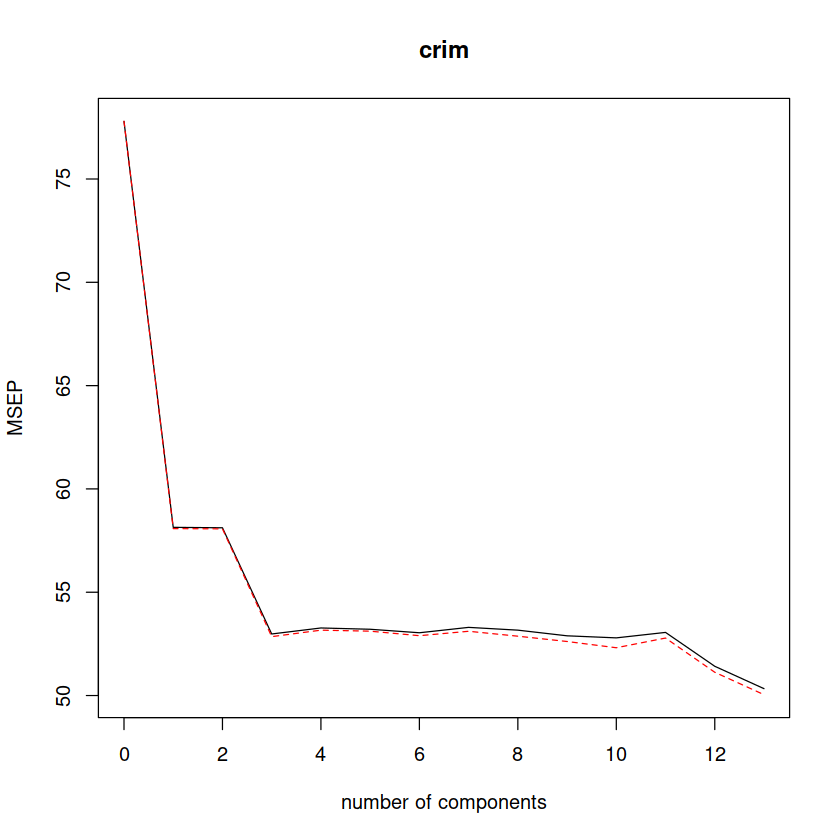

In [156]:
validationplot(pcr.fit, val.type = "MSEP")

The model with 13 variables has the lowest MSEP.

In [157]:
pred <- predict(pcr.fit, Boston[test, ], ncomp = 13)
pcr.mse <- mean((pred - Boston[test, ]$crim)^2)
pcr.mse

[1] 38.19

Let’s the the PLS.

In [158]:
set.seed(1)
pls.fit <- plsr(crim ~ ., data = Boston[train, ],
                scale = TRUE, validation = "CV")
summary(pls.fit)

Data: 	X dimension: 253 13 
	Y dimension: 253 1
Fit method: kernelpls
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            8.82    7.529    7.263    7.260    7.278    7.283    7.276
adjCV         8.82    7.521    7.249    7.235    7.253    7.254    7.246
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       7.249    7.245    7.238     7.241     7.243     7.243     7.243
adjCV    7.221    7.217    7.211     7.213     7.215     7.215     7.215

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       45.73    55.18    59.59    67.52    74.32    77.54    82.64    86.00
crim    29.63    36.99    39.82    40.63    41.09    41.44    41.54    41.62
      9 comps  10 comps  11 comps  12 comps  13 comps
X       89.43     94.62     96.33     98.45    100.00
crim    41.66     41.67 

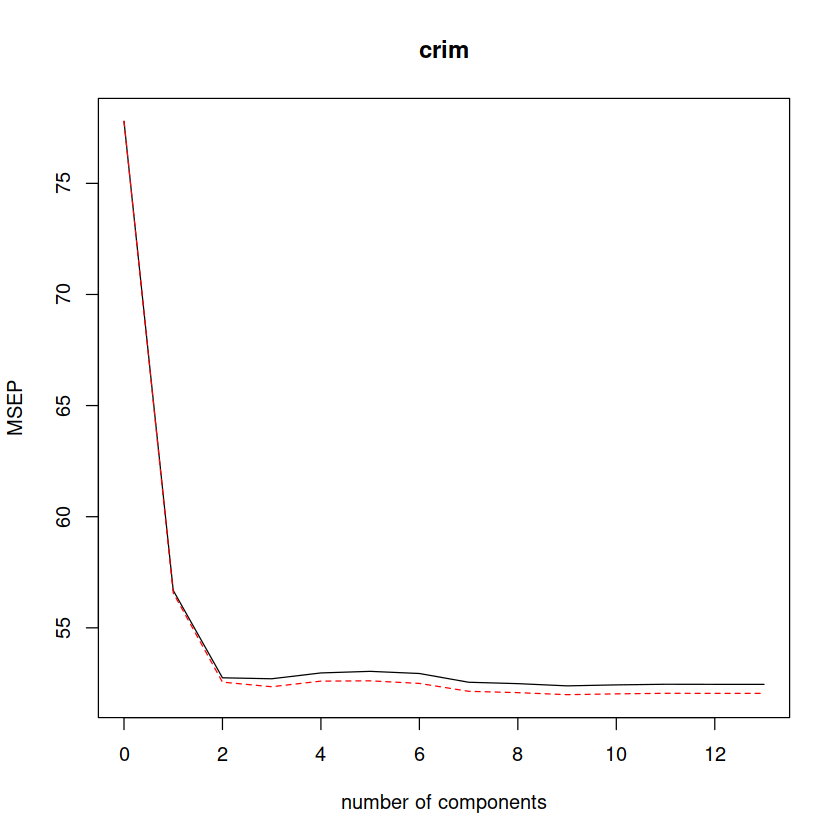

In [159]:
validationplot(pls.fit, val.type = "MSEP")

PLS obtains lowest MESP error with 9 variables.

In [160]:
pred <- predict(pls.fit, Boston[test, ], ncomp = 9)
pls.mse <- mean((pred - Boston[test, ]$crim)^2)
pls.mse

[1] 38.02701

In [161]:
result <- data.frame(
    bic = bic.mse,
    cp = cp.mse,
    ridge = ridge.mse,
    lasso = lasso.mse,
    pcr = pcr.mse,
    pls = pls.mse
)
result[, order(result)]

cp,ridge,lasso,pls,pcr,bic
37.40458,37.43973,37.82271,38.02701,38.19,38.71669


The method that yielded the best test error was the best subset selection with Mallows’s $C_p$ criterion, following by the Ridge Regression.

In [162]:
cp.coefi <- data.frame(coef(regfit, 6))
ridge.coefi <- data.frame(
    as.matrix(coef(cv.ridge, s = 0.568661449881442))
)

In [163]:
rownames_to_column(cp.coefi) %>%
    full_join(rownames_to_column(ridge.coefi))

Joining, by = "rowname"


rowname,coef.regfit..6.,X1
(Intercept),6.16422584,NA
zn,0.06359604,0.037073866
nox,-9.71892823,-4.722087684
rm,1.29193260,1.321510205
dis,-1.13579122,-0.867784756
rad,0.50518344,0.429611550
medv,-0.28747098,-0.195276987
X.Intercept.,NA,0.699286117
X.Intercept..1,NA,0.000000000
indus,NA,-0.066532729


The best model, selected with the best subset using Mallows’s $C_p$, used fewer features, only 6, while the second best, the Ridge Regression, used all the 13 variables.

Among the common features between those two models, the coefficients didn’t get very close to each other — except, perhaps, for **rm** — but the signal of each coefficient is consistent, implying they contribute to the same direction of inference.